# Importing Libraries

Import necessary libraries and read the datasets

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.utils import resample
from collections import Counter
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# EDA

## 1. Understanding the dataset


### 1.1 Data Overview and Initial Inspection

This code snippet performs the following operations:

1. **Loading the Dataset**:
   - Reads a CSV file (`guilds.csv`) into a Pandas DataFrame (`original_data`).
   
2. **Dataset Shape**:
   - Prints the number of rows and columns in the dataset. 

3. **Data Types and Missing Values**:
   - Uses `.info()` to provide a concise summary of the DataFrame, including:
     - Column names
     - Number of non-null entries per column (indicating potential missing data)
     - Data types (e.g., `float64`, `object`)
     - Memory usage of the dataset
   
#### Observations from the Output:
`(253680, 31)` indicates the dataset contains 253,680 rows and 31 columns.

The visualization of the dataset using the .info() method reveals that most columns have substantial data, though many exhibit missing values, as seen in the non-null counts for each column. Specifically, no column is entirely complete, with varying degrees of missing data present.

Among the 31 variables in the dataset:
- `14` columns are categorical, represented as object data types.
- `17` columns are numerical, represented as float64.

In [2]:
original_data = pd.read_csv('data/guilds.csv')

print(f"Number of rows and columns: {original_data.shape}")

print("\nData Types and Missing Values:")
original_data.info()

Number of rows and columns: (253680, 31)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Fae_Dust_Reserve                     228327 non-null  float64
 1   Physical_Stamina                     228269 non-null  float64
 2   Mystical_Index                       228480 non-null  float64
 3   Healer_consultation_Presence         228348 non-null  object 
 4   Elixir_veggies_consumption_Presence  228110 non-null  object 
 5   Mystic_Energy_Level                  228177 non-null  float64
 6   Bolt_of_doom_Presence                228146 non-null  object 
 7   Age_of_Wisdom                        228309 non-null  float64
 8   High_willingness_Presence            228370 non-null  object 
 9   Defense_spell_difficulty_Presence    228385 non-null  object 
 10  Doc_ava

### 1.2 Dataset Description
#### Numerical Data
The `.describe()` method is used to summarize the numerical data in the dataset. 

#### Categorical Data
The `.describe(include='object')` method summarizes the categorical data in the dataset.

These summaries offer a quick overview of the data's structure and potential insights into both numerical and categorical variables.

In [3]:
original_data.describe()


Fae_Dust_Reserve  Physical_Stamina  Mystical_Index  \
count     228327.000000     228269.000000   228480.000000   
mean           9.011950          4.237833       28.384703   
std            6.135197          8.718006        6.615276   
min            0.000771          0.000000       12.000000   
25%            4.329324          0.000000       24.000000   
50%            7.812104          0.000000       27.000000   
75%           12.426241          3.000000       31.000000   
max           50.809638         30.000000       98.000000   

       Mystic_Energy_Level  Age_of_Wisdom  Mental_Wizardry  \
count        228177.000000  228309.000000    228266.000000   
mean              0.999796       8.035978         3.183326   
std               0.997866       3.052688         7.406399   
min               0.000011       1.000000         0.000000   
25%               0.286304       6.000000         0.000000   
50%               0.694514       8.000000         0.000000   
75%               1.390092      10.000000         2.000000   
max              13.096465      13.000000        30.000000   

       Potion_Power_Level  Gold_Pouches_Per_Year  Wizardry_Skill  \
count       228241.000000          228367.000000   228414.000000   
mean            50.058044               6.057040       49.948452   
std             28.858348               2.070317       15.014295   
min              0.001273               1.000000      -12.515839   
25%             24.977367               5.000000       39.831133   
50%             50.127937               7.000000       49.966800   
75%             75.011510               8.000000       60.060113   
max             99.999895               8.000000      115.245552   

       Spell_Mastering_Days  Level_of_Academic_Wisdom  \
count         228476.000000             228120.000000   
mean               3.996350                  5.050123   
std                2.829260                  0.985930   
min                0.001112                  1.000000   
25%                1.913701                  4.000000   
50%                3.351681                  5.000000   
75%                5.380260                  6.000000   
max               31.692387                  6.000000   

       General_Health_Condition  Dragon_Sight_Sharpness  Enchanted_Coin_Count  \
count             228111.000000           228141.000000         228149.000000   
mean                   2.511273                5.002218            249.518118   
std                    1.067748                2.232844            144.269471   
min                    1.000000                0.000000              0.000000   
25%                    2.000000                3.000000            125.000000   
50%                    2.000000                5.000000            249.000000   
75%                    3.000000                6.000000            375.000000   
max                    5.000000               18.000000            499.000000   

       Celestial_Alignment  Knightly_Valor     Rune_Power  
count        228007.000000   228178.000000  228414.000000  
mean              5.330323        4.994969      28.519541  
std               1.841398        1.581795      15.941950  
min               1.011919        0.000000       0.025153  
25%               3.994796        4.000000      16.074807  
50%               5.259830        5.000000      26.396689  
75%               6.638099        6.000000      38.885087  
max               9.988370       10.000000      94.868193

In [4]:
original_data.describe(include='object')


Healer_consultation_Presence Elixir_veggies_consumption_Presence  \
count                        228348                              228110   
unique                            2                                   2   
top                         Present                             Present   
freq                         217170                              185091   

       Bolt_of_doom_Presence High_willingness_Presence  \
count                 228146                    228370   
unique                     2                         2   
top                   Absent                    Absent   
freq                  218851                    131504   

       Defense_spell_difficulty_Presence Doc_availability_challenge_Presence  \
count                             228385                              228233   
unique                                 2                                   2   
top                               Absent                              Absent   
freq                              189940                              209024   

       Dexterity_check_Presence Fruits_of_eden_consumption_Presence  \
count                    228637                              228451   
unique                        2                                   2   
top                     Present                             Present   
freq                     220084                              144829   

       Knight_physical_training_Presence Royal_family_pressure_Presence  \
count                             228221                         228175   
unique                                 2                              2   
top                              Present                         Absent   
freq                              172643                         130306   

       Guild_Membership Heavy_elixir_consumption_Presence  \
count            228233                            228270   
unique                3                                 2   
top            No_Guild                            Absent   
freq             192328                            215459   

       Stigmata_of_the_cursed_Presence Dragon_status_Presence  
count                           228525                 228019  
unique                               2                      2  
top                             Absent                 Absent  
freq                            206959                 126907

## Data Exploration & Cleaning

### 1.3 Identifying Missing Values

We check for missing values in the dataset using the `.isnull().sum()` method and filters to display only the columns with missing values. 


In [5]:
missing_values = original_data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values >0])

Missing values in each column:
Fae_Dust_Reserve                       25353
Physical_Stamina                       25411
Mystical_Index                         25200
Healer_consultation_Presence           25332
Elixir_veggies_consumption_Presence    25570
Mystic_Energy_Level                    25503
Bolt_of_doom_Presence                  25534
Age_of_Wisdom                          25371
High_willingness_Presence              25310
Defense_spell_difficulty_Presence      25295
Doc_availability_challenge_Presence    25447
Mental_Wizardry                        25414
Potion_Power_Level                     25439
Dexterity_check_Presence               25043
Gold_Pouches_Per_Year                  25313
Wizardry_Skill                         25266
Spell_Mastering_Days                   25204
Level_of_Academic_Wisdom               25560
General_Health_Condition               25569
Fruits_of_eden_consumption_Presence    25229
Knight_physical_training_Presence      25459
Royal_family_pressure_Pr

### 1.4 Calculating Missing Rates for Each Column

We calculate the percentage of missing values for each column to better understand the extent of missing data in the dataset.
- The `.isnull().sum()` method counts the missing values for each column.
- Only columns with a missing rate greater than 0% are displayed.
- The `sort_values(ascending=False)` method arranges the results in descending order.

In [6]:
missing_rate = original_data.isnull().sum() / len(original_data) * 100  

print("Missing rate for each column (%):")
print(missing_rate[missing_rate > 0].sort_values(ascending=False))  

Missing rate for each column (%):
Celestial_Alignment                    10.120230
Dragon_status_Presence                 10.115500
Elixir_veggies_consumption_Presence    10.079628
General_Health_Condition               10.079234
Level_of_Academic_Wisdom               10.075686
Dragon_Sight_Sharpness                 10.067408
Bolt_of_doom_Presence                  10.065437
Enchanted_Coin_Count                   10.064254
Royal_family_pressure_Presence         10.054005
Mystic_Energy_Level                    10.053217
Knightly_Valor                         10.052822
Knight_physical_training_Presence      10.035872
Guild_Membership                       10.031142
Doc_availability_challenge_Presence    10.031142
Potion_Power_Level                     10.027988
Mental_Wizardry                        10.018133
Physical_Stamina                       10.016950
Heavy_elixir_consumption_Presence      10.016556
Age_of_Wisdom                          10.001183
Fae_Dust_Reserve                   

### 1.5 Distribution of Missing Values per Row

This analysis investigates how missing values are distributed across the rows of the dataset.

1. **Largest Number of Missing Values**:
   - The row with the most missing values contains **14 missing entries**.
   
2. **Smallest Number of Missing Values**:
   - Some rows are complete, containing **0 missing values**.

**The bar chart reveals**:
  - Most rows have between **1 and 4 missing values**, with a peak at 3 missing values.
  - Rows with **7 or more missing values** are uncommon.
  - The dataset has a small percentage of rows with either no missing values or many missing values.

Even though analyzing the distribution of missing values may appear as part of a data cleaning task, this step in Exploratory Data Analysis (EDA) is crucial for understanding the dataset's structure and planning appropriate preprocessing strategies. In this case, handling missing values is not only about cleaning but also about preparing the data for effective visualization and analysis.

Our approach focuses on **preserving as much information as possible** to ensure data integrity and model accuracy. Instead of removing rows or columns with missing values, we adopt strategies such as **imputing missing values** with appropriate statistical measures (e.g., mode, mean, or median). This ensures that:
- The dataset remains comprehensive.
- Key patterns and relationships within the data are retained.

By addressing missing values thoughtfully, we enhance the quality of the dataset and set a strong foundation for building accurate and reliable models while supporting effective visualizations.


The largest number of missing values in a row: 14
The smallest number of missing values in a row: 0


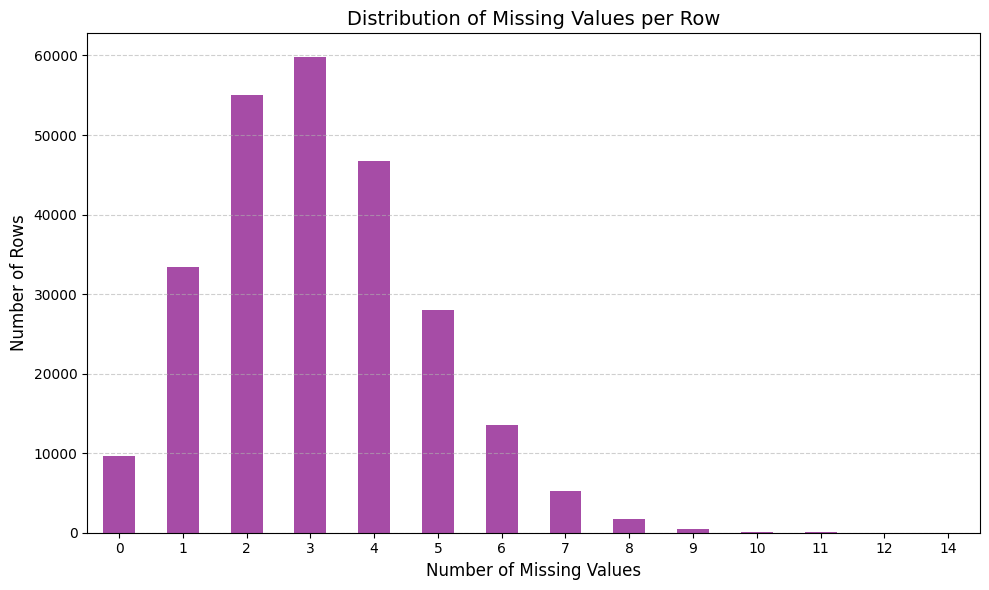

In [7]:
missing_values_per_row = original_data.isnull().sum(axis=1)

max_missing = missing_values_per_row.max()
min_missing = missing_values_per_row.min()

print(f"The largest number of missing values in a row: {max_missing}")
print(f"The smallest number of missing values in a row: {min_missing}")

missing_value_counts = missing_values_per_row.value_counts().sort_index()

plt.figure(figsize=(10, 6))
missing_value_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Distribution of Missing Values per Row", fontsize=14)
plt.xlabel("Number of Missing Values", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Summary of Dataset Exploration

So far, we have thoroughly explored the original dataset through the following steps:

1. **Basic Dataset Overview**:
   - Retrieved basic information about the dataset using `.info()` to understand its structure, data types, and missing values.

2. **Description of Columns**:
   - Analyzed both **numerical columns** and **categorical columns**.

3. **Missing Values Analysis**:
   - Examined missing values:
     - **Per column**: Identified the count and rate of missing values for each column.
     - **Per row**: Investigated how missing values are distributed across rows.

### Observations:
- The **highest percentage of missing values** per column is approximately **10%**, which is manageable for further preprocessing.
- The **maximum number of missing values per row** is **14**, though the majority of rows contain **1 to 5 missing values**, making the dataset relatively complete.

### 1.6 Handling Missing Values
The steps taken ensure that rows with missing values in this critical column are removed to maintain the quality of the data.

We created a copy of the original dataset (`original_data`) and assigned  it to `df` to ensures that the original dataset remains unaltered during the modification process.

#### Results:
- **Before Dropping**: 25,447 missing values.
- **After Dropping**: 0 missing values.



In [8]:
df= original_data.copy()

Removing the missing rows that have a null value for the target variable.

In [9]:
print(f"Missing values in Guild_Membership: {df['Guild_Membership'].isnull().sum()}")
df = df.dropna(subset=['Guild_Membership'])

print(f"Missing values in Guild_Membership after dropping: {df['Guild_Membership'].isnull().sum()}")

Missing values in Guild_Membership: 25447
Missing values in Guild_Membership after dropping: 0


### 1.7 Distribution of Guild Membership
This will help us identify rows and variables that will help in testing and training our models with the relevant information for future classification.

#### Results:
- **No_Guild**: 192,328 entries
- **Master_Guild**: 31,739 entries
- **Apprentice_Guild**: 4,166 entries


Guild_Membership
No_Guild            192328
Master_Guild         31739
Apprentice_Guild      4166
Name: count, dtype: int64


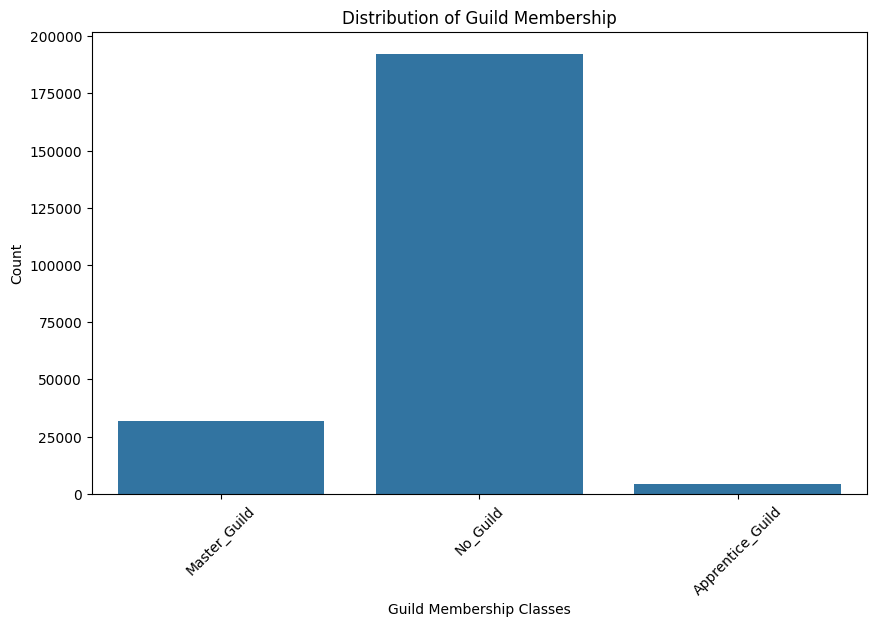

In [10]:
value_counts = df['Guild_Membership'].value_counts()
print(value_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Guild_Membership')
plt.title('Distribution of Guild Membership')
plt.xlabel('Guild Membership Classes')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


### 1.8 Separating categorical and numerical discrete or numerical continuous columns ###
Separate DataFrames are created for categorical, numerical, discrete, and continuous data.

#### Implications:
- Categorical data will be analyzed for frequency distribution and visualization using bar charts.
- Discrete numerical data is suitable for count-based analyses.
- Continuous numerical data will be explored with statistical summaries and visualized using histograms or box plots.

In [11]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

discrete_columns = []
continuous_columns = []

for column in numerical_columns:
    unique_values = df[column].nunique() 
    if df[column].dtype == 'int64' or unique_values < 20: 
        discrete_columns.append(column)
    else:
        continuous_columns.append(column)

categorical_data = df[categorical_columns]
numerical_data = df[numerical_columns]
discrete_data = df[discrete_columns]
continuous_data = df[continuous_columns]

print("Categorical Columns:", list(categorical_columns))
print("Numerical Columns:", list(numerical_columns))
print("Discrete Numerical Columns:", discrete_columns)
print("Continuous Numerical Columns:", continuous_columns)

Categorical Columns: ['Healer_consultation_Presence', 'Elixir_veggies_consumption_Presence', 'Bolt_of_doom_Presence', 'High_willingness_Presence', 'Defense_spell_difficulty_Presence', 'Doc_availability_challenge_Presence', 'Dexterity_check_Presence', 'Fruits_of_eden_consumption_Presence', 'Knight_physical_training_Presence', 'Royal_family_pressure_Presence', 'Guild_Membership', 'Heavy_elixir_consumption_Presence', 'Stigmata_of_the_cursed_Presence', 'Dragon_status_Presence']
Numerical Columns: ['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index', 'Mystic_Energy_Level', 'Age_of_Wisdom', 'Mental_Wizardry', 'Potion_Power_Level', 'Gold_Pouches_Per_Year', 'Wizardry_Skill', 'Spell_Mastering_Days', 'Level_of_Academic_Wisdom', 'General_Health_Condition', 'Dragon_Sight_Sharpness', 'Enchanted_Coin_Count', 'Celestial_Alignment', 'Knightly_Valor', 'Rune_Power']
Discrete Numerical Columns: ['Age_of_Wisdom', 'Gold_Pouches_Per_Year', 'Level_of_Academic_Wisdom', 'General_Health_Condition', 'Dragon

## 2. Descriptive Statistics

### Columns Distributions

### 2.1. Distribution of NUMERICAL columns

Visualize distributions of numerical columns to uncover patterns, outliers, and data properties.

#### Design:
1. **Dynamic Layout:** Rows and columns are calculated based on the number of variables to optimize space.
2. **Histograms with KDE:** Histograms reveal frequency, while KDE overlays smooth density estimation for better interpretation.
3. **Customization:** Titles, labels, and consistent formatting improve readability.
4. **Clean Layout:** Extra empty plots are removed, and `plt.tight_layout()` ensures clarity.


#### Ouput Observations:
1. **Skewed Distributions:** Columns like "Fae_Dust_Reserve" show right skew.
2. **Multimodality:** Variables like "Knightly_Valor" suggest clusters or subgroups.
3. **Uniform and Normal-like Data:** Columns such as "Potion_Power_Level" appear uniform, while "Wizardry_Skill" is nearly normal.
4. **Anomalies:** Spikes in variables like "Gold_Pouches_Per_Year" may indicate data issues or unique trends.
5. Here we also notice that the "Potion_powe_level" and "Enchanted_Coin_Count" have the same distribution so we consider them for dropping.

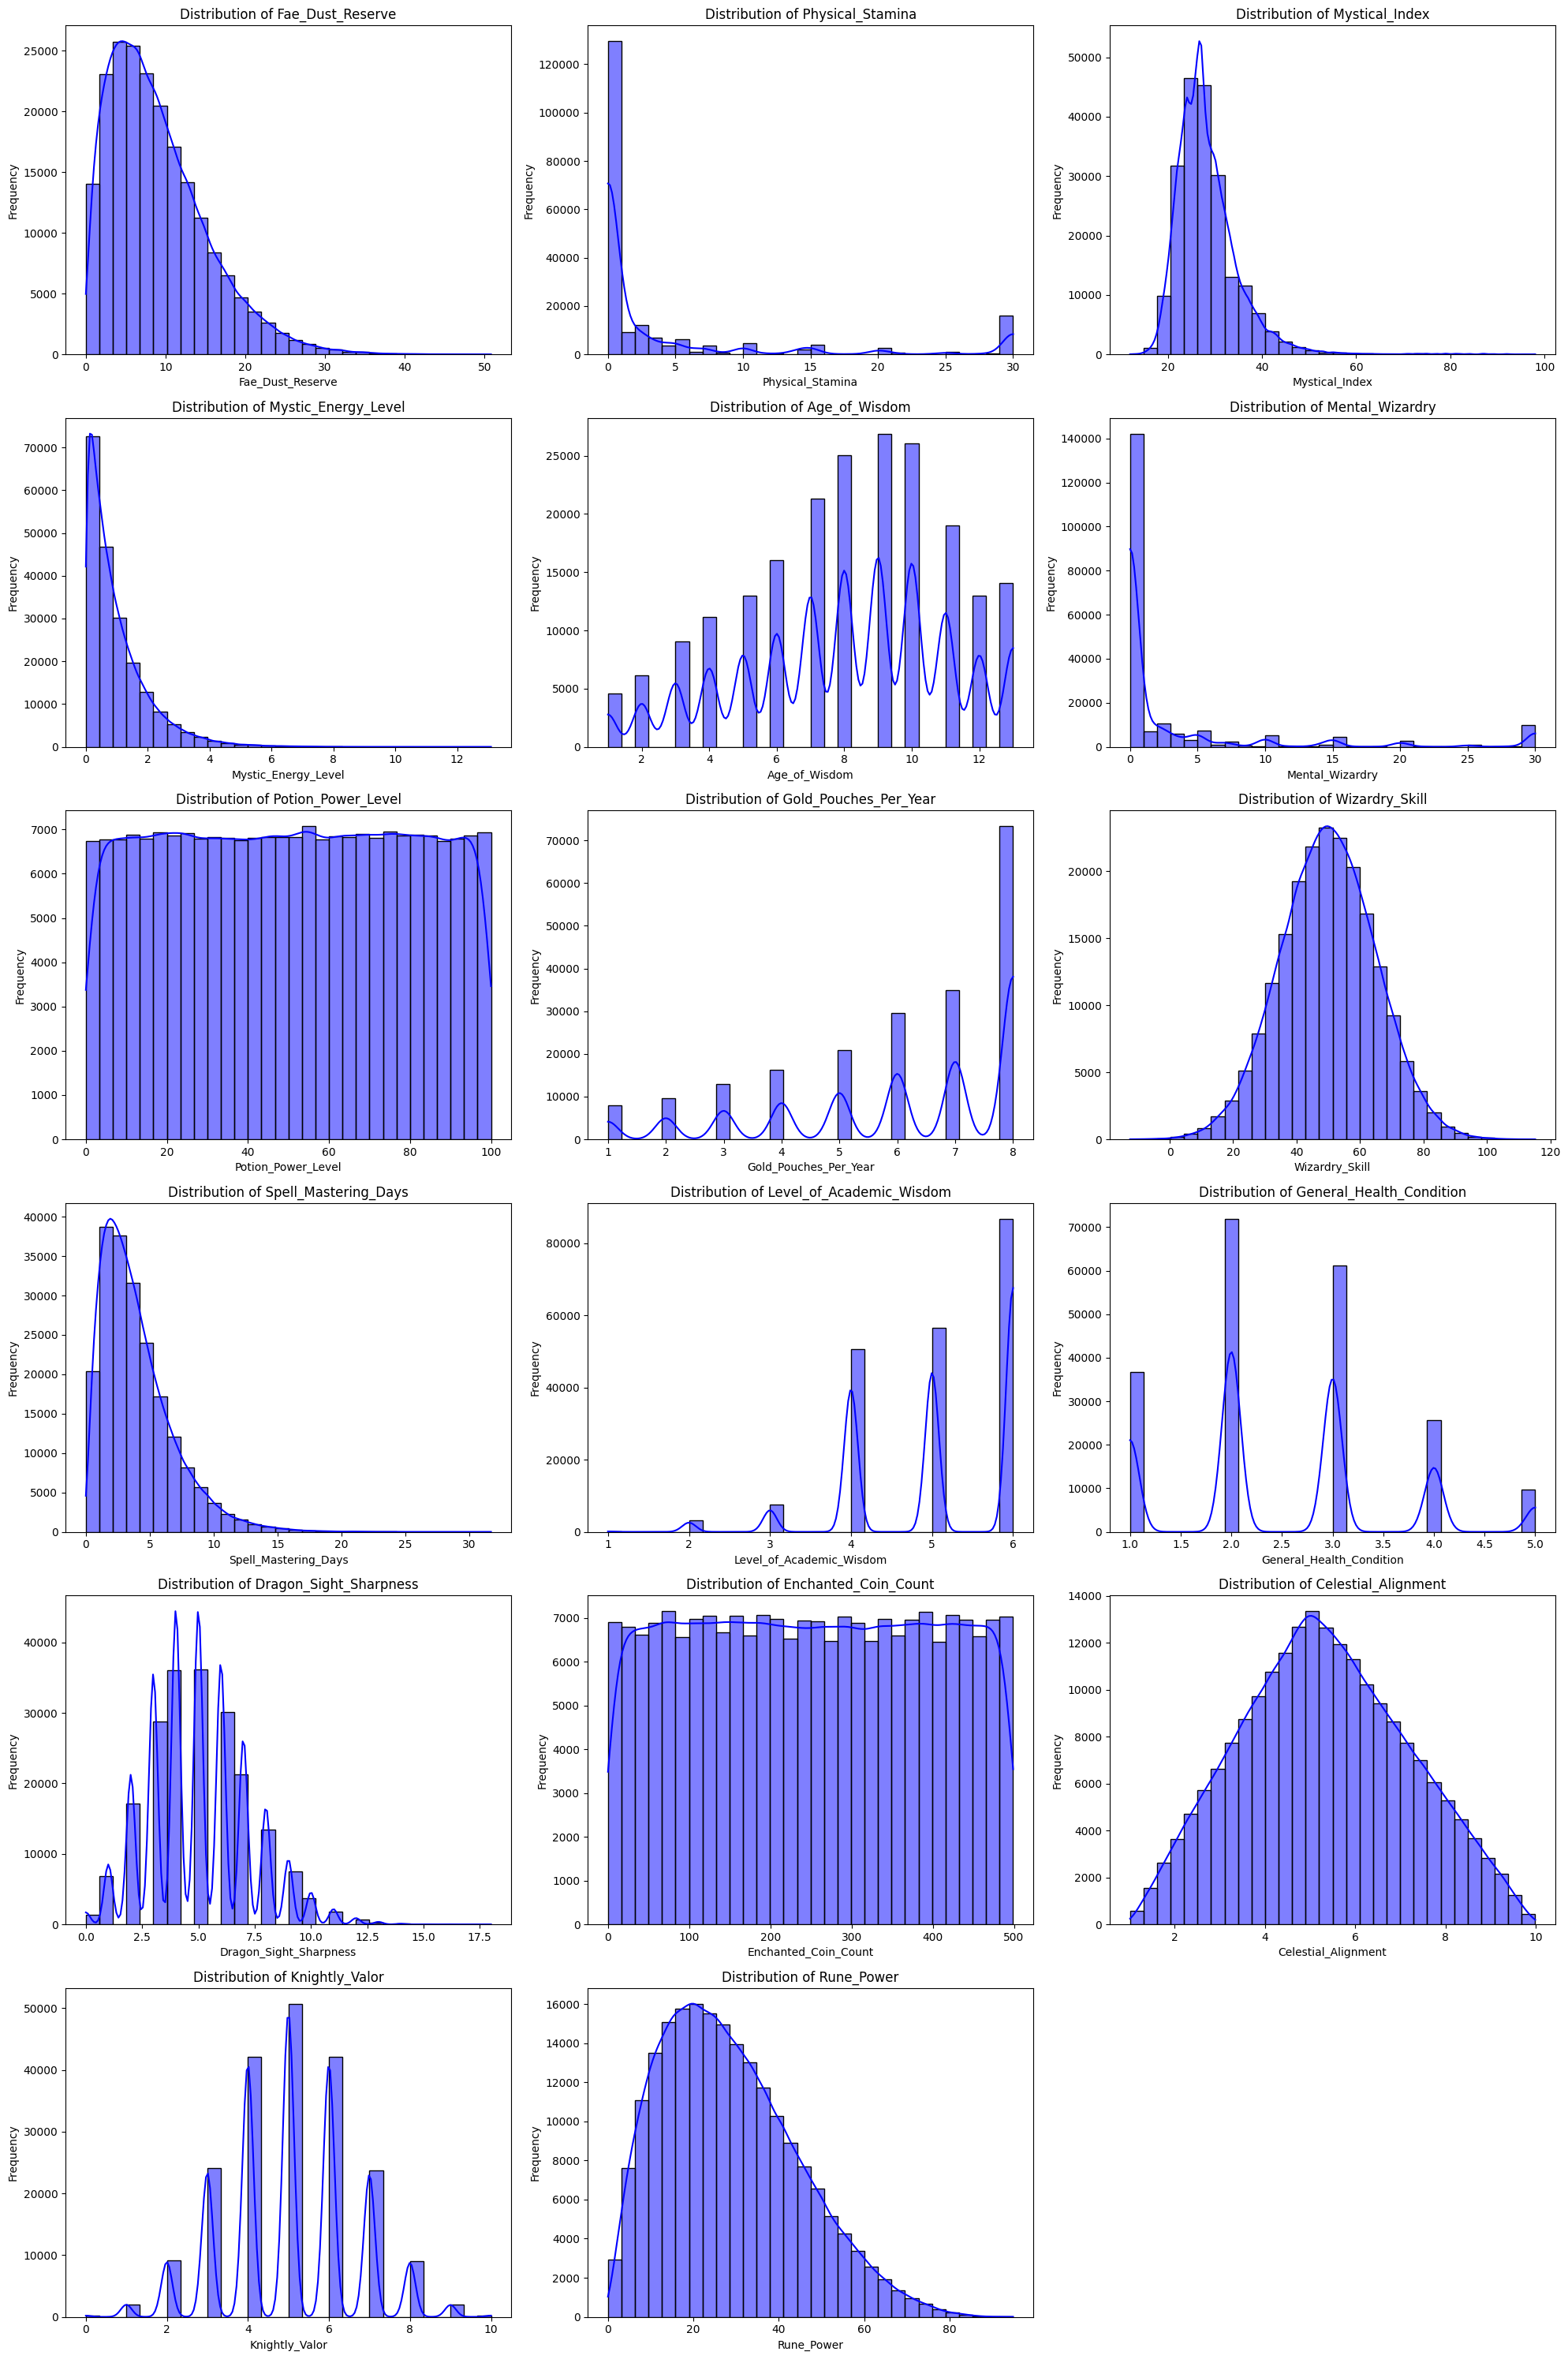

In [12]:
n_cols = 3  
n_rows = -(-len(numerical_columns) // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  

for idx, column in enumerate(numerical_columns):
    sns.histplot(numerical_data[column], kde=True, bins=30, color='blue', ax=axes[idx])
    axes[idx].set_title(f"Distribution of {column}")
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("Frequency")

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 2.1.2 Distribution of CATEGORICAL columns


Column: Healer_consultation_Presence
Healer_consultation_Presence
Present    195303
Absent      10106
Name: count, dtype: int64

Column: Elixir_veggies_consumption_Presence
Elixir_veggies_consumption_Presence
Present    166578
Absent      38690
Name: count, dtype: int64

Column: Bolt_of_doom_Presence
Bolt_of_doom_Presence
Absent     196951
Present      8398
Name: count, dtype: int64

Column: High_willingness_Presence
High_willingness_Presence
Absent     118294
Present     87107
Name: count, dtype: int64

Column: Defense_spell_difficulty_Presence
Defense_spell_difficulty_Presence
Absent     170843
Present     34586
Name: count, dtype: int64

Column: Doc_availability_challenge_Presence
Doc_availability_challenge_Presence
Absent     188224
Present     17247
Name: count, dtype: int64

Column: Dexterity_check_Presence
Dexterity_check_Presence
Present    198006
Absent       7689
Name: count, dtype: int64

Column: Fruits_of_eden_consumption_Presence
Fruits_of_eden_consumption_Presence
Presen

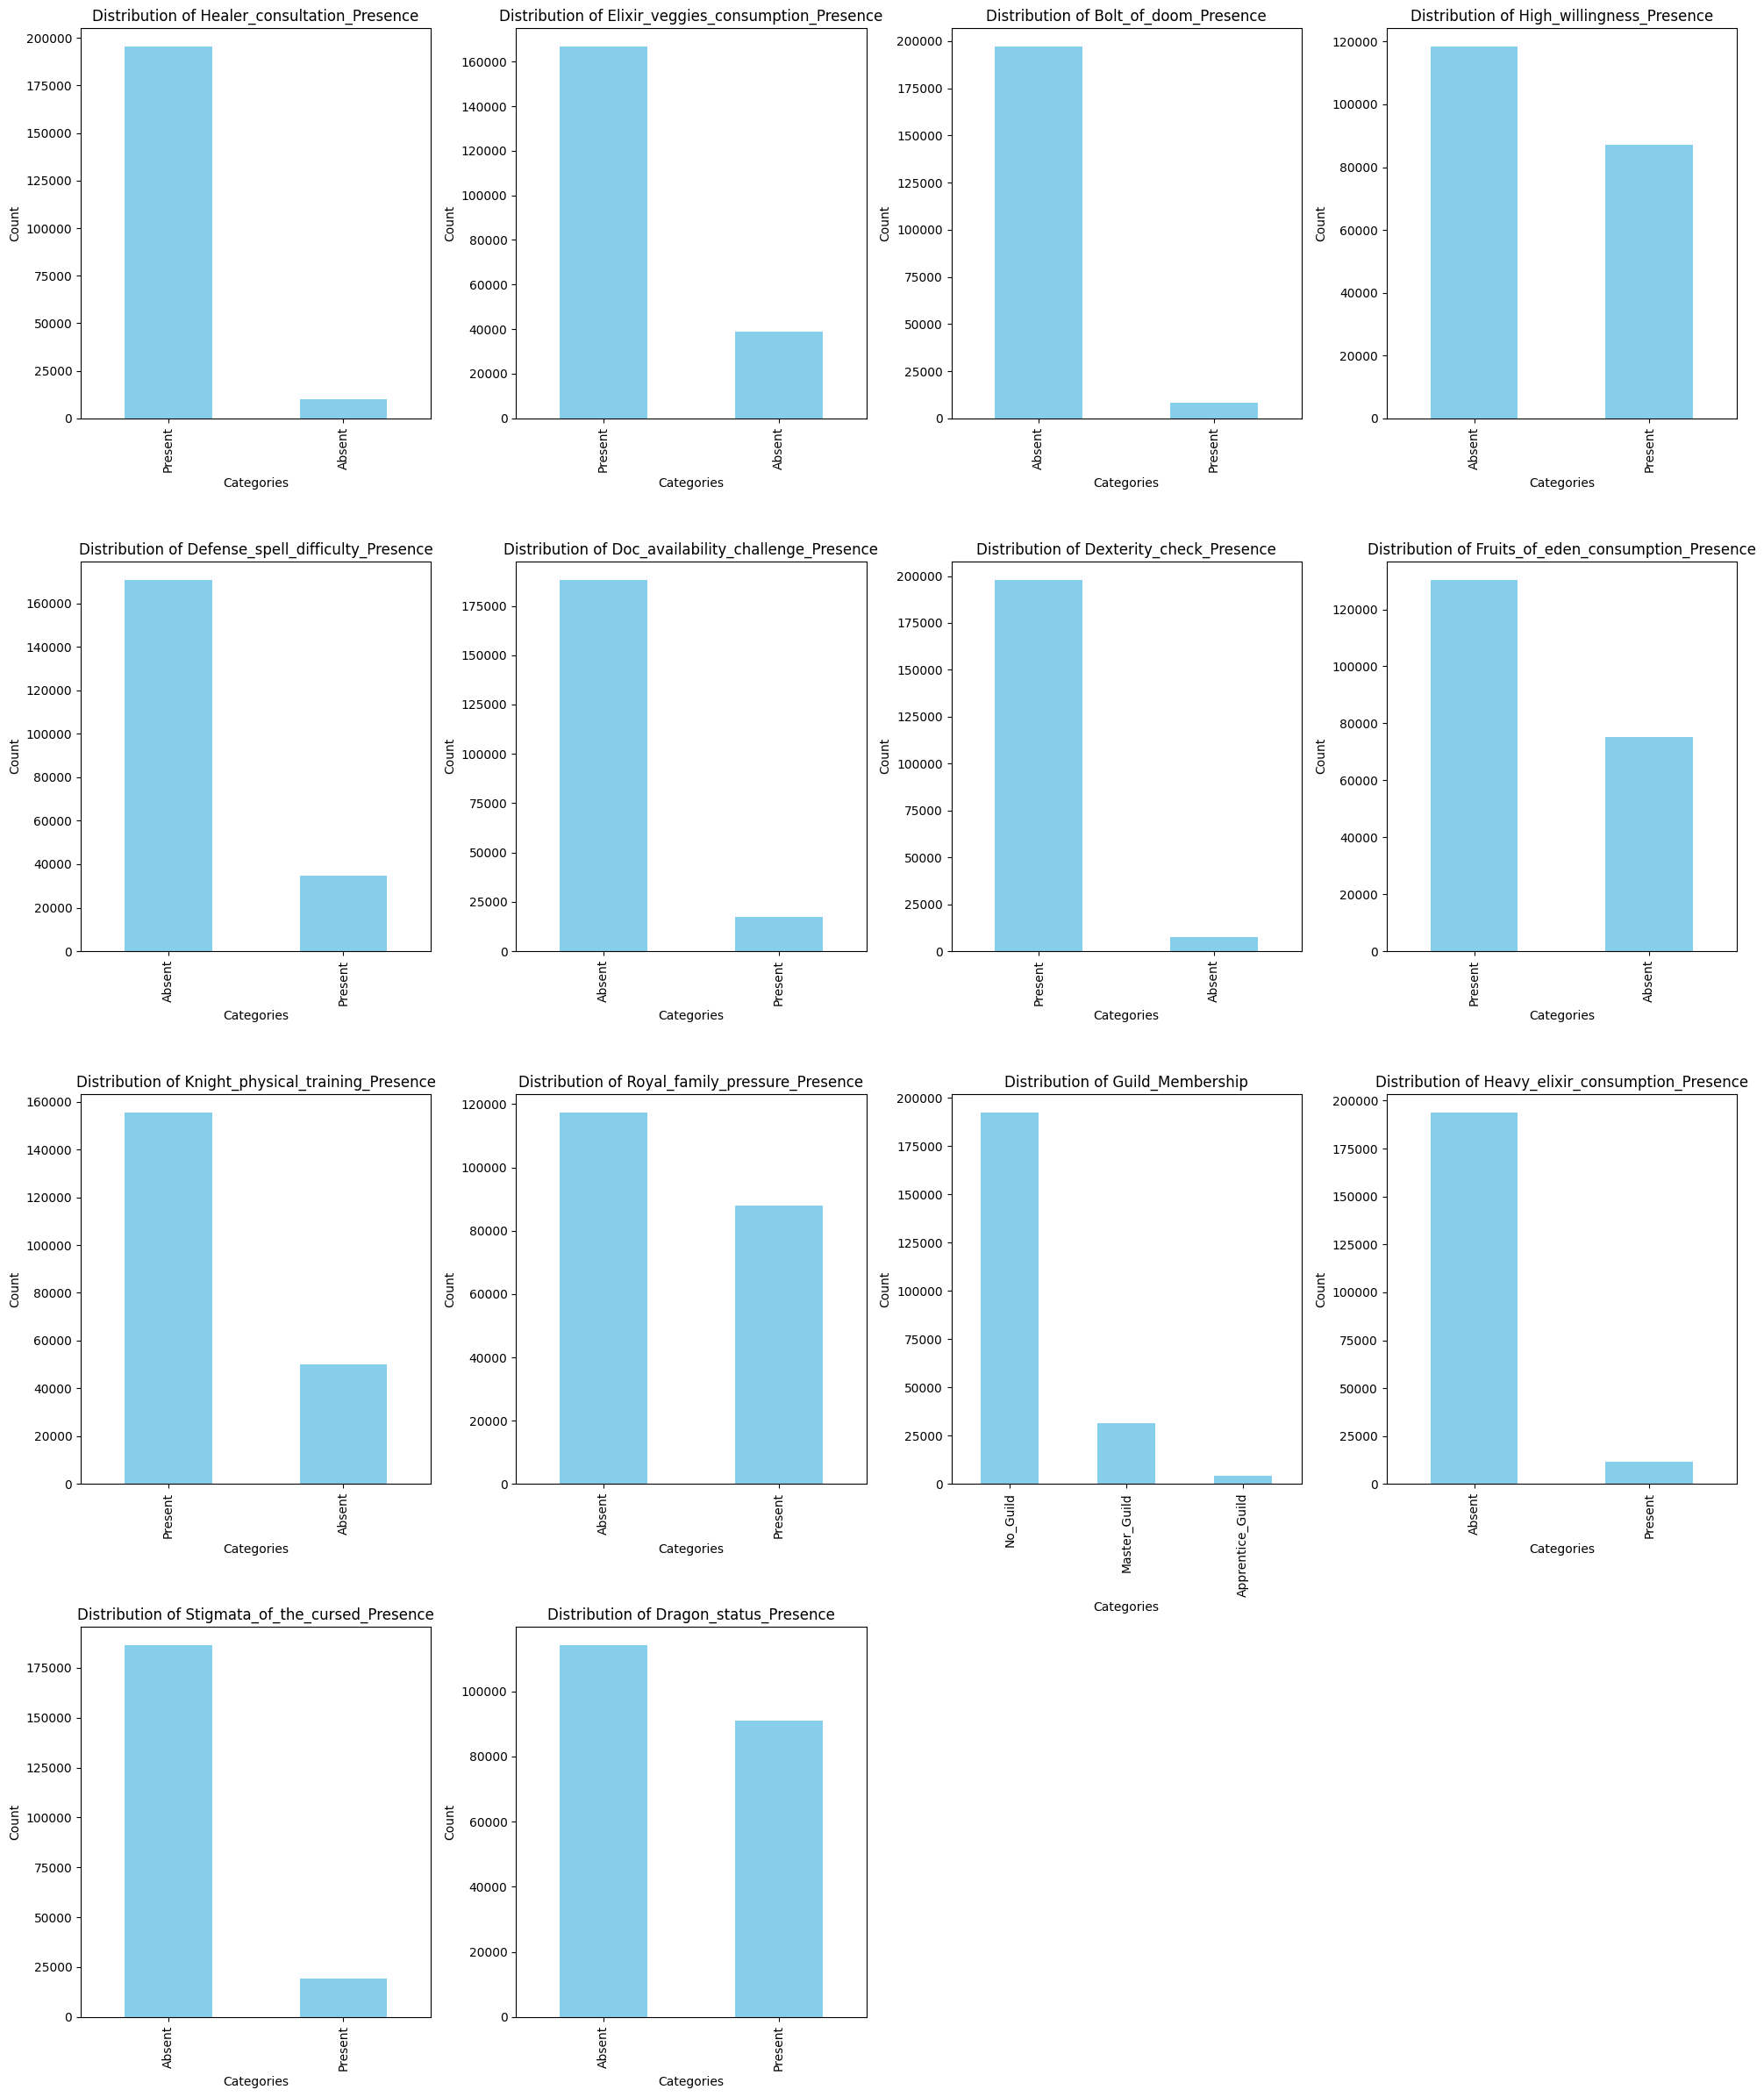

In [13]:

n_cols = 4  
n_rows = -(-len(categorical_columns) // n_cols) 


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()  

for idx, column in enumerate(categorical_columns):

    print(f"\nColumn: {column}")
    print(categorical_data[column].value_counts())

    categorical_data[column].value_counts().plot(kind='bar', color='skyblue', ax=axes[idx])
    axes[idx].set_title(f"Distribution of {column}")
    axes[idx].set_ylabel("Count")
    axes[idx].set_xlabel("Categories")

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Key Observations:
1. **Skewed Distributions:**
   - Variables like **Healer_consultation_Presence** and **Bolt_of_doom_Presence** show dominance of one category ("Present" or "Absent"), indicating common or rare events.

2. **Balanced Distributions:**
   - Variables like **Dragon_status_Presence** and **High_willingness_Presence** are more balanced, suggesting greater variability and potential predictive value.

3. **Multiclass Categories:**
   - **Guild_Membership** reveals clear stratification, with "No Guild" being the most common and "Prestigious Guild" the rarest.

4. **Rare Events:**
   - Variables like **Heavy_elixir_consumption_Presence** and **Stigmata_of_the_cursed_Presence** highlight infrequent behaviors, useful for identifying edge cases.

### Implications:
- **Feature Engineering:** Skewed variables may need balancing, while balanced variables offer strong predictive potential.

 Here we check the distribution of the categorical variables. 

## 2.2 Encoding the target variable to see coorelation of each category to the other features ###

The dataset is divided into three subsets based on the encoded guild membership (`No_Guild`, `Apprentice_Guild`, `Master_Guild`).

For fututre reference, we will address classify Guild stasus classification as such:
- **0: No Guild**
- **1: Master Guild**
- **2: Apperntice Guild**

In [14]:
guild_mapping = {
    'No_Guild': 0,
    'Apprentice_Guild': 2,
    'Master_Guild': 1
}

df['Guild_Membership_encoded'] = df['Guild_Membership'].map(guild_mapping)


In [15]:
no_guild_data = df[df['Guild_Membership_encoded'] == 0]
apprentice_guild_data = df[df['Guild_Membership_encoded'] == 2]
master_guild_data = df[df['Guild_Membership_encoded'] == 1]

In [16]:
df = df.drop(columns=['Guild_Membership'])
print("Remaining columns after dropping Guild_Membership:")
print(df.columns)

Remaining columns after dropping Guild_Membership:
Index(['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index',
       'Healer_consultation_Presence', 'Elixir_veggies_consumption_Presence',
       'Mystic_Energy_Level', 'Bolt_of_doom_Presence', 'Age_of_Wisdom',
       'High_willingness_Presence', 'Defense_spell_difficulty_Presence',
       'Doc_availability_challenge_Presence', 'Mental_Wizardry',
       'Potion_Power_Level', 'Dexterity_check_Presence',
       'Gold_Pouches_Per_Year', 'Wizardry_Skill', 'Spell_Mastering_Days',
       'Level_of_Academic_Wisdom', 'General_Health_Condition',
       'Fruits_of_eden_consumption_Presence',
       'Knight_physical_training_Presence', 'Royal_family_pressure_Presence',
       'Dragon_Sight_Sharpness', 'Enchanted_Coin_Count', 'Celestial_Alignment',
       'Knightly_Valor', 'Heavy_elixir_consumption_Presence',
       'Stigmata_of_the_cursed_Presence', 'Dragon_status_Presence',
       'Rune_Power', 'Guild_Membership_encoded'],
      dtype='objec

Correlation matrices are computed for numerical columns within each guild group.

Heatmaps are used to visually represent the strength and direction of relationships between variables, making it easier to interpret.
   - Separate heatmaps are created for each guild group to highlight unique correlations or differences between categories.
   - This helps identify features that are either strongly correlated or uninformative within specific guild memberships.

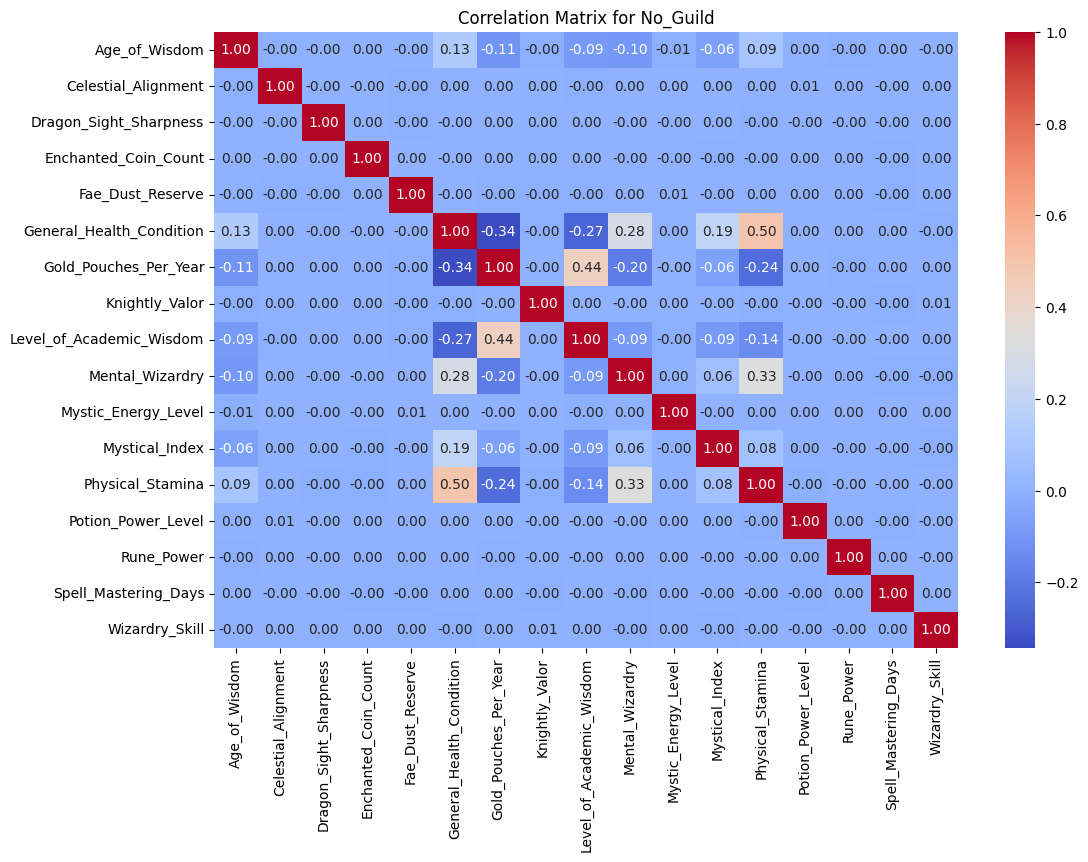

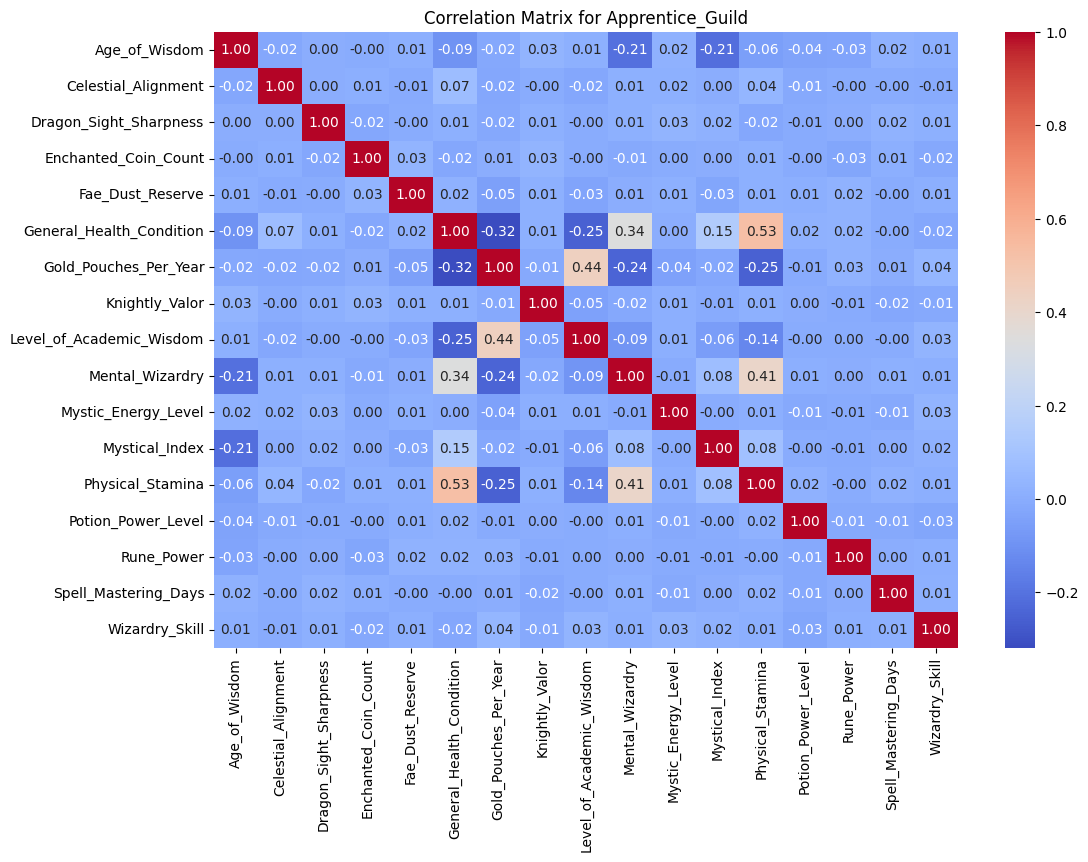

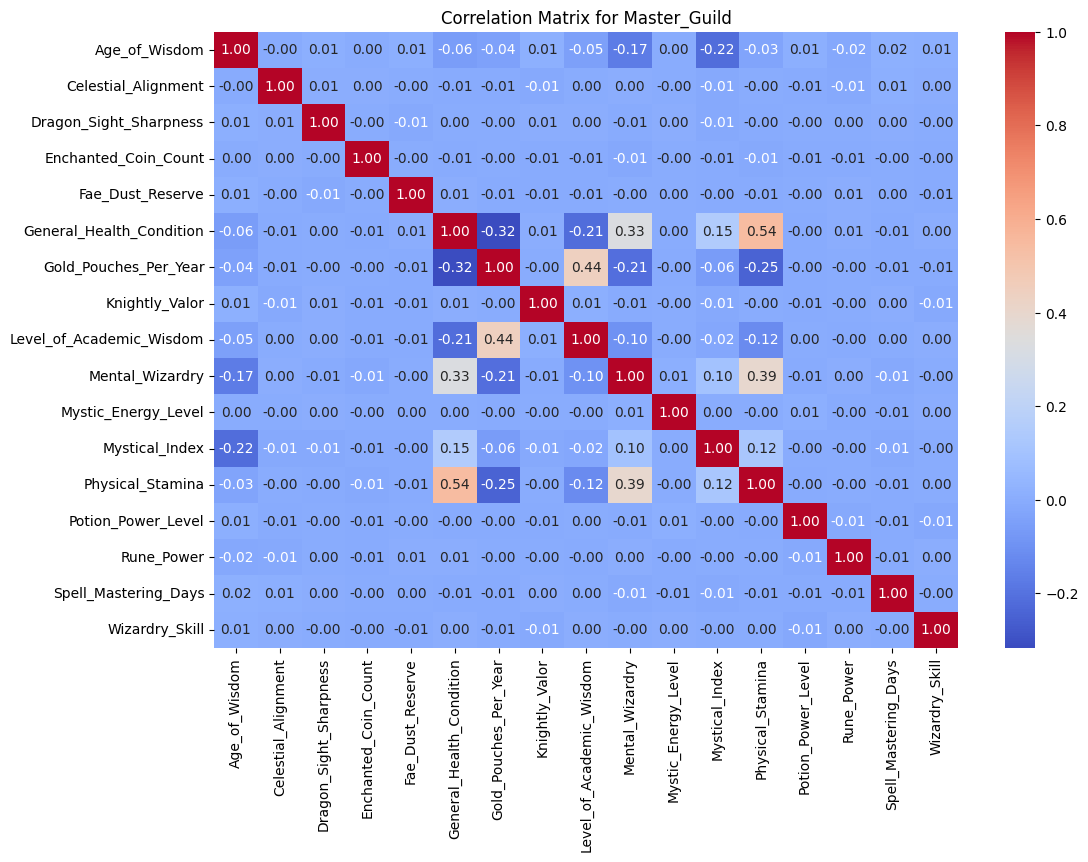

In [17]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Guild_Membership_encoded'])

no_guild_corr = no_guild_data[numerical_columns].corr()
apprentice_guild_corr = apprentice_guild_data[numerical_columns].corr()
master_guild_corr = master_guild_data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(no_guild_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for No_Guild')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(apprentice_guild_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Apprentice_Guild')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(master_guild_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Master_Guild')
plt.show()


#### Observations
- Rune_Power: We noticed that this feature consistently shows correlations close to 0 across all guild memberships, indicating it doesn’t provide meaningful relationships.
- Dragon_Sight_Sharpness: We observed that it has minimal correlation with other numerical features or the target variable, making it largely irrelevant.
- Spell_Mastering_Days: This feature has consistently low correlations across all guild categories, so we consider it uninformative.
- Celestial_Alignment: Its relationships with Guild_Membership and other features are very weak, offering little value.
- Wizardry_Skill: We found that this feature has consistently weak correlations across all guilds and doesn’t contribute any significant or differentiating information.

### 2.2.1 Extracting Top Correlated Features for Each Guild

This analysis identifies the top 10 strongest correlations (absolute values) among numerical features for each guild category: **No_Guild**, **Apprentice_Guild**, and **Master_Guild**.

Here we pay attention to give accurate values for each Guild as well as exclude self-correlations shown above in the correlation matices.

In [18]:

def get_top_correlations(corr_matrix, top_n=10):
    corr_matrix = corr_matrix.abs()  # Take absolute value of correlations
    np.fill_diagonal(corr_matrix.values, 0)  # Set diagonal to 0 to exclude self-correlations
    top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(top_n)
    return top_corr

# Apply the function to each guild correlation matrix
top_no_guild_corr = get_top_correlations(no_guild_corr)
top_apprentice_guild_corr = get_top_correlations(apprentice_guild_corr)
top_master_guild_corr = get_top_correlations(master_guild_corr)

print("Top correlations for No_Guild:\n", top_no_guild_corr)
print("\nTop correlations for Apprentice_Guild:\n", top_apprentice_guild_corr)
print("\nTop correlations for Master_Guild:\n", top_master_guild_corr)


Top correlations for No_Guild:
 General_Health_Condition  Physical_Stamina            0.497533
Gold_Pouches_Per_Year     Level_of_Academic_Wisdom    0.435137
General_Health_Condition  Gold_Pouches_Per_Year       0.342756
Mental_Wizardry           Physical_Stamina            0.330136
General_Health_Condition  Mental_Wizardry             0.284095
                          Level_of_Academic_Wisdom    0.267432
Gold_Pouches_Per_Year     Physical_Stamina            0.241585
Mental_Wizardry           Gold_Pouches_Per_Year       0.195759
General_Health_Condition  Mystical_Index              0.192636
Physical_Stamina          Level_of_Academic_Wisdom    0.138828
dtype: float64

Top correlations for Apprentice_Guild:
 Physical_Stamina          General_Health_Condition    0.531026
Gold_Pouches_Per_Year     Level_of_Academic_Wisdom    0.441771
Physical_Stamina          Mental_Wizardry             0.408837
General_Health_Condition  Mental_Wizardry             0.337065
                          Gold

#### Top Correlations  
- No_Guild: General_Health_Condition, Physical_Stamina, Level_of_Academic_Wisdom, Gold_Pouches_Per_Year, Mental_Wizardry, Mystical_Index
- Master_Guild: General_Health_Condition, Level_of_Academic_Wisdom, Gold_Pouches_Per_Year, Mental_Wizardry, Mystical_Index, Physical_Stamina
- Apprentice_Guild: Age_of_Wisdom, General_Health_Condition, Gold_Pouches_Per_Year, Mental_Wizardry, Mystical_Index

Most relevant for prediction and classification:
- Age_of_Wisdom
- General_Health_Condition
- Gold_Pouches_Per_Year
- Level_of_Academic_Wisdom
- Mental_Wizardry
- Physical_Stamina

### 2.2.2 Chi-Square Test for Categorical Features
We determine the relevance of categorical features for predicting the target variable using the Chi-Square test.

1. **Chi-Square Test:**
   - A statistical test used to evaluate whether there is a significant association between categorical variables.
   - The test produces a p-value, where:
     - **Low p-value (< 0.05):** Indicates a strong association.
     - **High p-value (≥ 0.05):** Suggests no significant relationship.

2. **Handling Missing Data:**
   - The code removes rows with missing values for the feature and target variable to ensure the test works correctly.

3. **Workflow:**
   - For each categorical column:
     1. Create a contingency table of counts for the feature and target variable.
     2. Perform the Chi-Square test using `scipy.stats.chi2_contingency`.
     3. Store the p-value for each feature.
   - Results are sorted by p-value to prioritize significant features.

In [19]:
def chi_square_test_skip_nan(df, target_column, categorical_columns):
    results = {}
    for col in categorical_columns:
        filtered_data = df[[col, target_column]].dropna()
        if filtered_data.empty: 
            results[col] = float('nan')  
            continue
        contingency_table = pd.crosstab(filtered_data[col], filtered_data[target_column])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results[col] = p  
    return pd.DataFrame(results.items(), columns=['Feature', 'P-Value']).sort_values(by='P-Value')

categorical_columns = [
    'Healer_consultation_Presence',
    'Elixir_veggies_consumption_Presence',
    'Bolt_of_doom_Presence',
    'High_willingness_Presence',
    'Defense_spell_difficulty_Presence',
    'Doc_availability_challenge_Presence',
    'Dexterity_check_Presence',
    'Fruits_of_eden_consumption_Presence',
    'Knight_physical_training_Presence',
    'Royal_family_pressure_Presence',
    'Heavy_elixir_consumption_Presence',
    'Stigmata_of_the_cursed_Presence',
    'Dragon_status_Presence',
]

chi_square_results = chi_square_test_skip_nan(df, 'Guild_Membership_encoded', categorical_columns)
print(chi_square_results)


                                Feature        P-Value
2                 Bolt_of_doom_Presence   0.000000e+00
3             High_willingness_Presence   0.000000e+00
4     Defense_spell_difficulty_Presence   0.000000e+00
8     Knight_physical_training_Presence   0.000000e+00
9        Royal_family_pressure_Presence   0.000000e+00
11      Stigmata_of_the_cursed_Presence   0.000000e+00
6              Dexterity_check_Presence  4.397154e-210
12               Dragon_status_Presence  2.994037e-174
1   Elixir_veggies_consumption_Presence  1.035469e-159
10    Heavy_elixir_consumption_Presence  3.576178e-151
7   Fruits_of_eden_consumption_Presence   3.968343e-75
5   Doc_availability_challenge_Presence   1.309751e-70
0          Healer_consultation_Presence   2.299236e-16


In [20]:
print(pd.crosstab(df['Bolt_of_doom_Presence'], df['Guild_Membership_encoded']))

Guild_Membership_encoded       0      1     2
Bolt_of_doom_Presence                        
Absent                    167501  25904  3546
Present                     5510   2664   224


#### Chi-Squared Explanation
 
For each categorical feature, a contingency table is created between the feature and the target (Guild_Membership_encoded).
A contingency table shows the frequency distribution of the feature values across each target category.

Low p-values: The feature is significantly associated with Guild_Membership_encoded and should likely be retained.
High p-values: The feature may not be associated and can potentially be dropped.

Lower Significance:
- Fruits_of_eden_consumption_Presence
- Doc_availability_challenge_Presence
- Healer_consultation_Presence

## 2.3 Reducing Set Plan

- Dropping all the irrelevant columns. 
- Dropping the rows where there is a missing value in the important features. 
- Dropping all the rows with missing values more then a certain threshold. 

We streamline the dataset by removing irrelevant features, redundant columns, and rows with excessive missing values to enhance model accuracy and efficiency.
The outcome is a cleaner dataset with relevant columns and improved data quality, ready for further modeling or analysis.

In [21]:
df_reduced= df.copy()

### 2.3.1 Dropping Irrelevant Columns

   - The original **Guild_Membership** column is redundant since its encoded version (`Guild_Membership_encoded`) is already included. Dropping it avoids duplication and simplifies the dataset.
   - Irrelevant features are identified based on the prior statistical analysis( eg. **Fruits_of_eden_consumption_Presence**), such as the Chi-Square test and correlation analysis. These features provide little to no predictive value and can be safely removed to improve model efficiency.

In [22]:
features_to_drop = [
    'Fruits_of_eden_consumption_Presence',
    'Doc_availability_challenge_Presence',
    'Healer_consultation_Presence',
    'Rune_Power',
    'Dragon_Sight_Sharpness',
    'Spell_Mastering_Days',
    'Wizardry_Skill',
    'Celestial_Alignment', 'Potion_Power_Level', 
    'Enchanted_Coin_Count', 
    'Fruits_of_eden_consumption_Presence',
    'Doc_availability_challenge_Presence',
    'Healer_consultation_Presence'
]
df_reduced = df_reduced.drop(columns=features_to_drop)

print("Remaining columns after dropping specified features:")
print(df_reduced.columns)

Remaining columns after dropping specified features:
Index(['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index',
       'Elixir_veggies_consumption_Presence', 'Mystic_Energy_Level',
       'Bolt_of_doom_Presence', 'Age_of_Wisdom', 'High_willingness_Presence',
       'Defense_spell_difficulty_Presence', 'Mental_Wizardry',
       'Dexterity_check_Presence', 'Gold_Pouches_Per_Year',
       'Level_of_Academic_Wisdom', 'General_Health_Condition',
       'Knight_physical_training_Presence', 'Royal_family_pressure_Presence',
       'Knightly_Valor', 'Heavy_elixir_consumption_Presence',
       'Stigmata_of_the_cursed_Presence', 'Dragon_status_Presence',
       'Guild_Membership_encoded'],
      dtype='object')


In [23]:
threshold = 6

missing_values_per_row = df_reduced.isnull().sum(axis=1)
df_reduced = df_reduced[~((missing_values_per_row > threshold) & (df_reduced['Guild_Membership_encoded'] != 2))]

print("Shape of the dataframe after dropping rows:", df_reduced.shape)

Shape of the dataframe after dropping rows: (227700, 21)


To reduce the set more looking at the heatmaps and the chi-square we can see what are the more relevant features, and based on their number of missing values in each row we consider droping some rows. 

### 2.3.2 Dropping Rows with Missing Values in Relevant 

1. **Balancing the Target Classes:**
   - We remove rows with missing values in relevant features for specific target classes (**No_Guild** and **Master_Guild**) to ensure a balanced dataset while maintaining data quality for these categories.

2. **Focus on Relevant Features:**
   - We focus on the selected features (e.g., **Physical_Stamina**, **Mental_Wizardry**, **High_willingness_Presence**) that we identified as most predictive based on prior analysis.
   - By keeping only rows with complete data for these features, we ensure the integrity and reliability of the dataset.

3. **Purpose of Dropping Rows:**
   - We recognize that null values in critical features can introduce noise and reduce the effectiveness of the model.
   - Our targeted row removal focuses on cleaning the data for **No_Guild** and **Master_Guild** without over-filtering, ensuring we preserve as much useful data as possible.

In [24]:
def drop_rows_with_missing_values(df_reduced):
    
    relevant_features = [
      
        'Physical_Stamina', 'General_Health_Condition', 
        'Gold_Pouches_Per_Year', 'Level_of_Academic_Wisdom', 
        'Mental_Wizardry',
        'Bolt_of_doom_Presence', 'High_willingness_Presence', 
        'Defense_spell_difficulty_Presence', 'Knight_physical_training_Presence', 
        'Royal_family_pressure_Presence', 'Stigmata_of_the_cursed_Presence'
    ]
    
    rows_to_drop = (df_reduced['Guild_Membership_encoded'] == 0) & (df_reduced[relevant_features].isnull().any(axis=1))
    
    df_cleaned = df_reduced[~rows_to_drop]
    
    return df_cleaned

df_cleaned = drop_rows_with_missing_values(df_reduced)

print("Original shape:", df_reduced.shape)
print("New shape after dropping rows:", df_cleaned.shape)



Original shape: (227700, 21)
New shape after dropping rows: (95828, 21)


## 2.4 Guild Membership Distribution

We calculate and visualize the distribution of `Guild_Membership_encoded` to understand the class balance within the cleaned dataset.

Distribution of Guild Membership (Encoded):
Guild_Membership_encoded
0    59991
1    31671
2     4166
Name: count, dtype: int64


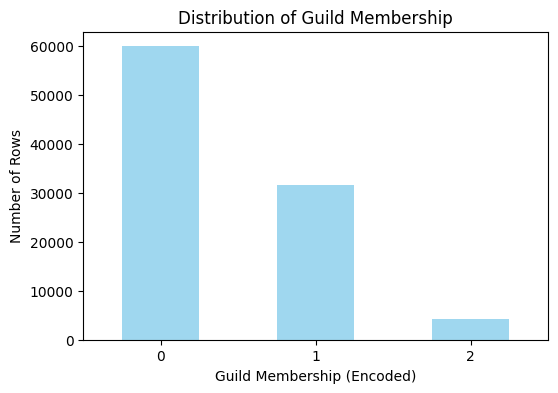

In [25]:
distribution = df_cleaned['Guild_Membership_encoded'].value_counts()

print("Distribution of Guild Membership (Encoded):")
print(distribution)

plt.figure(figsize=(6, 4))
distribution.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Guild Membership')
plt.xlabel('Guild Membership (Encoded)')
plt.ylabel('Number of Rows')
plt.xticks(rotation=0)
plt.show()


#### Downsampling to Balance the Dataset

From the graph above, we visually see that there is a class imbalance in the data. This can make out models biased and/or smaller data getting less importance for training.

**Downsampling** is used to balance the dataset by reducing the size of the dominant classes, **Master Guild** and **No Guild**, ensuring fair representation across all classes. This prevents the model from becoming biased towards majority classes, reduces the risk of overfitting or underfitting, and improves overall performance. By creating a balanced dataset, the model can make more reliable and unbiased predictions for all target classes.


Dataset saved as 'balanced_dataset.csv'
New class distribution:
Guild_Membership_encoded
0    17000
1    10000
2     4166
Name: count, dtype: int64


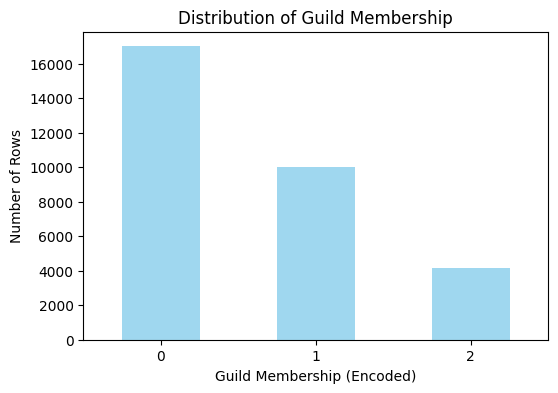

In [26]:
class_0 = df_cleaned[df_cleaned['Guild_Membership_encoded'] == 0]  
class_1 = df_cleaned[df_cleaned['Guild_Membership_encoded'] == 1]  
class_2 = df_cleaned[df_cleaned['Guild_Membership_encoded'] == 2]  

class_0_downsampled = resample(class_0, replace=False, n_samples=17000, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=10000, random_state=42)
class_2_unchanged = class_2

df_balanced = pd.concat([class_0_downsampled, class_1_downsampled, class_2_unchanged])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.to_csv('balanced_dataset.csv', index=False)
print("Dataset saved as 'balanced_dataset.csv'")

print("New class distribution:")
print(df_balanced['Guild_Membership_encoded'].value_counts())

distribution = df_balanced['Guild_Membership_encoded'].value_counts()

plt.figure(figsize=(6, 4))
distribution.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Distribution of Guild Membership')
plt.xlabel('Guild Membership (Encoded)')
plt.ylabel('Number of Rows')
plt.xticks(rotation=0)
plt.show()

In [27]:
print("Shape of the final dataset:", df_balanced.shape)

Shape of the final dataset: (31166, 21)


## 3. Feature Selection

### 3.1 Data Splitting

To categorize the dataset into:
1. **Categorical Columns**
2. **Numerical Columns**
   - Further split into **Discrete** and **Continuous** features based on unique value counts and data type.

In [28]:
categorical_columns = df_balanced.select_dtypes(include=['object', 'bool']).columns
numerical_columns = df_balanced.select_dtypes(include=['float64', 'int64']).columns

discrete_columns = []
continuous_columns = []

for column in numerical_columns:
    unique_values = df_balanced[column].nunique()  
    if unique_values < 20 or df_balanced[column].dtype == 'int64':  
        discrete_columns.append(column)
    else:
        continuous_columns.append(column)

print("Categorical Columns:", list(categorical_columns))
print("Numerical Columns:", list(numerical_columns))
print("Discrete Numerical Columns:", discrete_columns)
print("Continuous Numerical Columns:", continuous_columns)


Categorical Columns: ['Elixir_veggies_consumption_Presence', 'Bolt_of_doom_Presence', 'High_willingness_Presence', 'Defense_spell_difficulty_Presence', 'Dexterity_check_Presence', 'Knight_physical_training_Presence', 'Royal_family_pressure_Presence', 'Heavy_elixir_consumption_Presence', 'Stigmata_of_the_cursed_Presence', 'Dragon_status_Presence']
Numerical Columns: ['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index', 'Mystic_Energy_Level', 'Age_of_Wisdom', 'Mental_Wizardry', 'Gold_Pouches_Per_Year', 'Level_of_Academic_Wisdom', 'General_Health_Condition', 'Knightly_Valor', 'Guild_Membership_encoded']
Discrete Numerical Columns: ['Age_of_Wisdom', 'Gold_Pouches_Per_Year', 'Level_of_Academic_Wisdom', 'General_Health_Condition', 'Knightly_Valor', 'Guild_Membership_encoded']
Continuous Numerical Columns: ['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index', 'Mystic_Energy_Level', 'Mental_Wizardry']


### 3.2 Handling Missing Values

#### Why use KNN Imputation?
To address missing values in the dataset while preserving the relationships between features.

- **Continuous Features:**
  - Scaling combined with KNN ensures imputations are consistent with the overall feature distribution.
- **Discrete Features:**
  - By rounding the imputed values, KNN maintains the categorical or ordinal nature of the data.
- **Data Integrity:**
  - The imputer avoids arbitrary assumptions about missing values, relying on nearest neighbors to make data-driven estimations.

1. **Scaling Continuous Features:**
   - Continuous columns were scaled to standardize their values for effective KNN imputation.

2. **Imputation for Continuous and Discrete Features:**
   - Missing values in continuous features were filled using the KNN Imputer after scaling.
   - For discrete features, KNN Imputer was directly applied, and imputed values were rounded to preserve their categorical nature.


In [29]:
# Apply KNN Imputer to continuous after scaling and discrete columns directly
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(df_balanced[continuous_columns])

knn_imputer = KNNImputer(n_neighbors=5)
df_balanced[continuous_columns] = knn_imputer.fit_transform(scaled_continuous)

df_balanced[discrete_columns] = knn_imputer.fit_transform(df_balanced[discrete_columns])
df_balanced[discrete_columns] = df_balanced[discrete_columns].round(0).astype(int)

print("\nMissing values after KNN Imputation:")
print(df_balanced.isnull().sum())



Missing values after KNN Imputation:
Fae_Dust_Reserve                          0
Physical_Stamina                          0
Mystical_Index                            0
Elixir_veggies_consumption_Presence    3159
Mystic_Energy_Level                       0
Bolt_of_doom_Presence                  1417
Age_of_Wisdom                             0
High_willingness_Presence              1391
Defense_spell_difficulty_Presence      1406
Mental_Wizardry                           0
Dexterity_check_Presence               3073
Gold_Pouches_Per_Year                     0
Level_of_Academic_Wisdom                  0
General_Health_Condition                  0
Knight_physical_training_Presence      1400
Royal_family_pressure_Presence         1455
Knightly_Valor                            0
Heavy_elixir_consumption_Presence      3180
Stigmata_of_the_cursed_Presence        1407
Dragon_status_Presence                 3153
Guild_Membership_encoded                  0
dtype: int64


The results show that most columns now have zero missing values. However, some features still retain missing data after imputation:
- **Significant Missing Values Remaining:**
  - **Elixir_veggies_consumption_Presence**: 3,159
  - **Bolt_of_doom_Presence**: 1,417
  - **High_willingness_Presence**: 1,391
  - **Defense_spell_difficulty_Presence:** 1,406
  - **Dexterity_check_Presence**: 3,073
  - **Knight_physical_training_Presence:** 1,400
  - **Royal_family_pressure_Presence**: 1,455
  - **Heavy_elixir_consumption_Presence**: 3,180
  - **Stigmata_of_the_cursed_Presence**: 1,407
  - **Dragon_status_Presence**: 3,153

#### Analysis of Original Values in Categorical Columns

We examine the unique values present in the categorical columns, including missing data (`NaN`), before applying further preprocessing or imputation.

In [30]:
print("Original values in columns:")
for col in categorical_columns:
    print(f"{col}: {df_balanced[col].unique()}")


Original values in columns:
Elixir_veggies_consumption_Presence: ['Present' 'Absent' nan]
Bolt_of_doom_Presence: ['Absent' 'Present' nan]
High_willingness_Presence: ['Absent' 'Present' nan]
Defense_spell_difficulty_Presence: ['Absent' nan 'Present']
Dexterity_check_Presence: ['Present' nan 'Absent']
Knight_physical_training_Presence: ['Present' 'Absent' nan]
Royal_family_pressure_Presence: ['Present' 'Absent' nan]
Heavy_elixir_consumption_Presence: ['Absent' nan 'Present']
Stigmata_of_the_cursed_Presence: [nan 'Absent' 'Present']
Dragon_status_Presence: ['Present' 'Absent' nan]


### 3.2.2 Encoding Binary Categorical Variables

#### Reason:

1. **Consistency:** Standardizes categories to prevent issues arising from inconsistent case or formatting.
2. **Binary Encoding:** Converts categorical values into a simple numerical format that is compatible with machine learning algorithms.
3. **Handling Missing Data:** Ensures missing values are clearly labeled and handled.

In [31]:
def binary_encode(df, categorical_columns):
    df_encoded = df.copy()

    for col in categorical_columns:
        print(f"Processing column: {col}")
      
        df_encoded[col] = df_encoded[col].astype(str).str.lower().str.strip()
        print(f"Cleaned unique values: {df_encoded[col].unique()}")

        df_encoded[col] = df_encoded[col].map({'yes': 1, 'present': 1, 'no': 0, 'absent': 0})
        print(f"Mapped unique values: {df_encoded[col].unique()}")

        df_encoded[col] = df_encoded[col].fillna(-1).astype(float)
        print(f"Final unique values after encoding: {df_encoded[col].unique()}")
    
    return df_encoded


categorical_columns = [
    "Elixir_veggies_consumption_Presence",
    "Bolt_of_doom_Presence",
    "High_willingness_Presence",
    "Defense_spell_difficulty_Presence",
    "Dexterity_check_Presence",
    "Knight_physical_training_Presence",
    "Royal_family_pressure_Presence",
    "Heavy_elixir_consumption_Presence",
    "Stigmata_of_the_cursed_Presence",
    "Dragon_status_Presence"
]

df_balanced = binary_encode(df_balanced, categorical_columns)

print("Unique values after encoding:")
for col in categorical_columns:
    print(f"{col}: {df_balanced[col].unique()}")


Processing column: Elixir_veggies_consumption_Presence
Cleaned unique values: ['present' 'absent' 'nan']
Mapped unique values: [ 1.  0. nan]
Final unique values after encoding: [ 1.  0. -1.]
Processing column: Bolt_of_doom_Presence
Cleaned unique values: ['absent' 'present' 'nan']
Mapped unique values: [ 0.  1. nan]
Final unique values after encoding: [ 0.  1. -1.]
Processing column: High_willingness_Presence
Cleaned unique values: ['absent' 'present' 'nan']
Mapped unique values: [ 0.  1. nan]
Final unique values after encoding: [ 0.  1. -1.]
Processing column: Defense_spell_difficulty_Presence
Cleaned unique values: ['absent' 'nan' 'present']
Mapped unique values: [ 0. nan  1.]
Final unique values after encoding: [ 0. -1.  1.]
Processing column: Dexterity_check_Presence
Cleaned unique values: ['present' 'nan' 'absent']
Mapped unique values: [ 1. nan  0.]
Final unique values after encoding: [ 1. -1.  0.]
Processing column: Knight_physical_training_Presence
Cleaned unique values: ['pres

### 3.3 KNN Imputation for Binary Features
#### Process
1. **Replace Missing Values:** Convert placeholder `-1` to `np.nan`.
2. **Apply KNN Imputer:** Use feature similarity to impute missing values.
3. **Round and Convert:** Ensure imputed values are binary (0 or 1).
4. **Update Dataset:** Replace original columns with imputed values.
5. **Verify:** Confirm no missing values remain

In [32]:
def knn_impute_binary(df, binary_columns, n_neighbors=5):
   
    df_copy = df.copy()
    columns_to_impute = binary_columns

    df_copy[columns_to_impute] = df_copy[columns_to_impute].replace(-1, np.nan)

    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = knn_imputer.fit_transform(df_copy[columns_to_impute])
    imputed_binary = pd.DataFrame(imputed_data, columns=columns_to_impute, index=df_copy.index)

    imputed_binary = imputed_binary.round().astype(int)
    df_copy[columns_to_impute] = imputed_binary

    return df_copy

df_balanced = knn_impute_binary(df_balanced, categorical_columns)

print("Missing values after KNN Imputation:")
print(df_balanced[categorical_columns].isnull().sum())

Missing values after KNN Imputation:
Elixir_veggies_consumption_Presence    0
Bolt_of_doom_Presence                  0
High_willingness_Presence              0
Defense_spell_difficulty_Presence      0
Dexterity_check_Presence               0
Knight_physical_training_Presence      0
Royal_family_pressure_Presence         0
Heavy_elixir_consumption_Presence      0
Stigmata_of_the_cursed_Presence        0
Dragon_status_Presence                 0
dtype: int64


After applying KNN Imputation:
- All missing values in binary categorical columns are filled.
- The binary nature of the columns is preserved, ensuring data consistency.
The dataset is now complete and ready for further analysis or modeling.

In [33]:
print("Missing values per column:")
print(df_balanced.isnull().sum())


Missing values per column:
Fae_Dust_Reserve                       0
Physical_Stamina                       0
Mystical_Index                         0
Elixir_veggies_consumption_Presence    0
Mystic_Energy_Level                    0
Bolt_of_doom_Presence                  0
Age_of_Wisdom                          0
High_willingness_Presence              0
Defense_spell_difficulty_Presence      0
Mental_Wizardry                        0
Dexterity_check_Presence               0
Gold_Pouches_Per_Year                  0
Level_of_Academic_Wisdom               0
General_Health_Condition               0
Knight_physical_training_Presence      0
Royal_family_pressure_Presence         0
Knightly_Valor                         0
Heavy_elixir_consumption_Presence      0
Stigmata_of_the_cursed_Presence        0
Dragon_status_Presence                 0
Guild_Membership_encoded               0
dtype: int64


In [34]:
numerical_columns = list(numerical_columns)
categorical_columns = list(set(categorical_columns))  

if 'Guild_Membership_encoded' in numerical_columns:
    numerical_columns.remove('Guild_Membership_encoded')

if 'Guild_Membership_encoded' not in categorical_columns:
    categorical_columns.append('Guild_Membership_encoded')

categorical_columns = list(set(categorical_columns))

print("Updated numerical columns:", numerical_columns)
print("Updated categorical columns:", categorical_columns)


Updated numerical columns: ['Fae_Dust_Reserve', 'Physical_Stamina', 'Mystical_Index', 'Mystic_Energy_Level', 'Age_of_Wisdom', 'Mental_Wizardry', 'Gold_Pouches_Per_Year', 'Level_of_Academic_Wisdom', 'General_Health_Condition', 'Knightly_Valor']
Updated categorical columns: ['Royal_family_pressure_Presence', 'Bolt_of_doom_Presence', 'Stigmata_of_the_cursed_Presence', 'Defense_spell_difficulty_Presence', 'High_willingness_Presence', 'Guild_Membership_encoded', 'Dragon_status_Presence', 'Elixir_veggies_consumption_Presence', 'Knight_physical_training_Presence', 'Dexterity_check_Presence', 'Heavy_elixir_consumption_Presence']


## 4. Preparing Data for Modelling

### 4.1 Checking for Outliers
We visualize numerical features using boxplots and identify potential outliers based on the Interquartile Range (IQR) method.

Outlier detection quickly identifies outliers in numerical features using the IQR method.
Boxplots provide a clear view of the data distribution and potential anomalies.


In [35]:

df_outliers= df_balanced.copy()

Fae_Dust_Reserve: 745 outliers
Physical_Stamina: 5372 outliers
Mystical_Index: 772 outliers
Mystic_Energy_Level: 1456 outliers
Age_of_Wisdom: 1069 outliers
Mental_Wizardry: 4528 outliers
Gold_Pouches_Per_Year: 0 outliers
Level_of_Academic_Wisdom: 0 outliers
General_Health_Condition: 2020 outliers
Knightly_Valor: 50 outliers


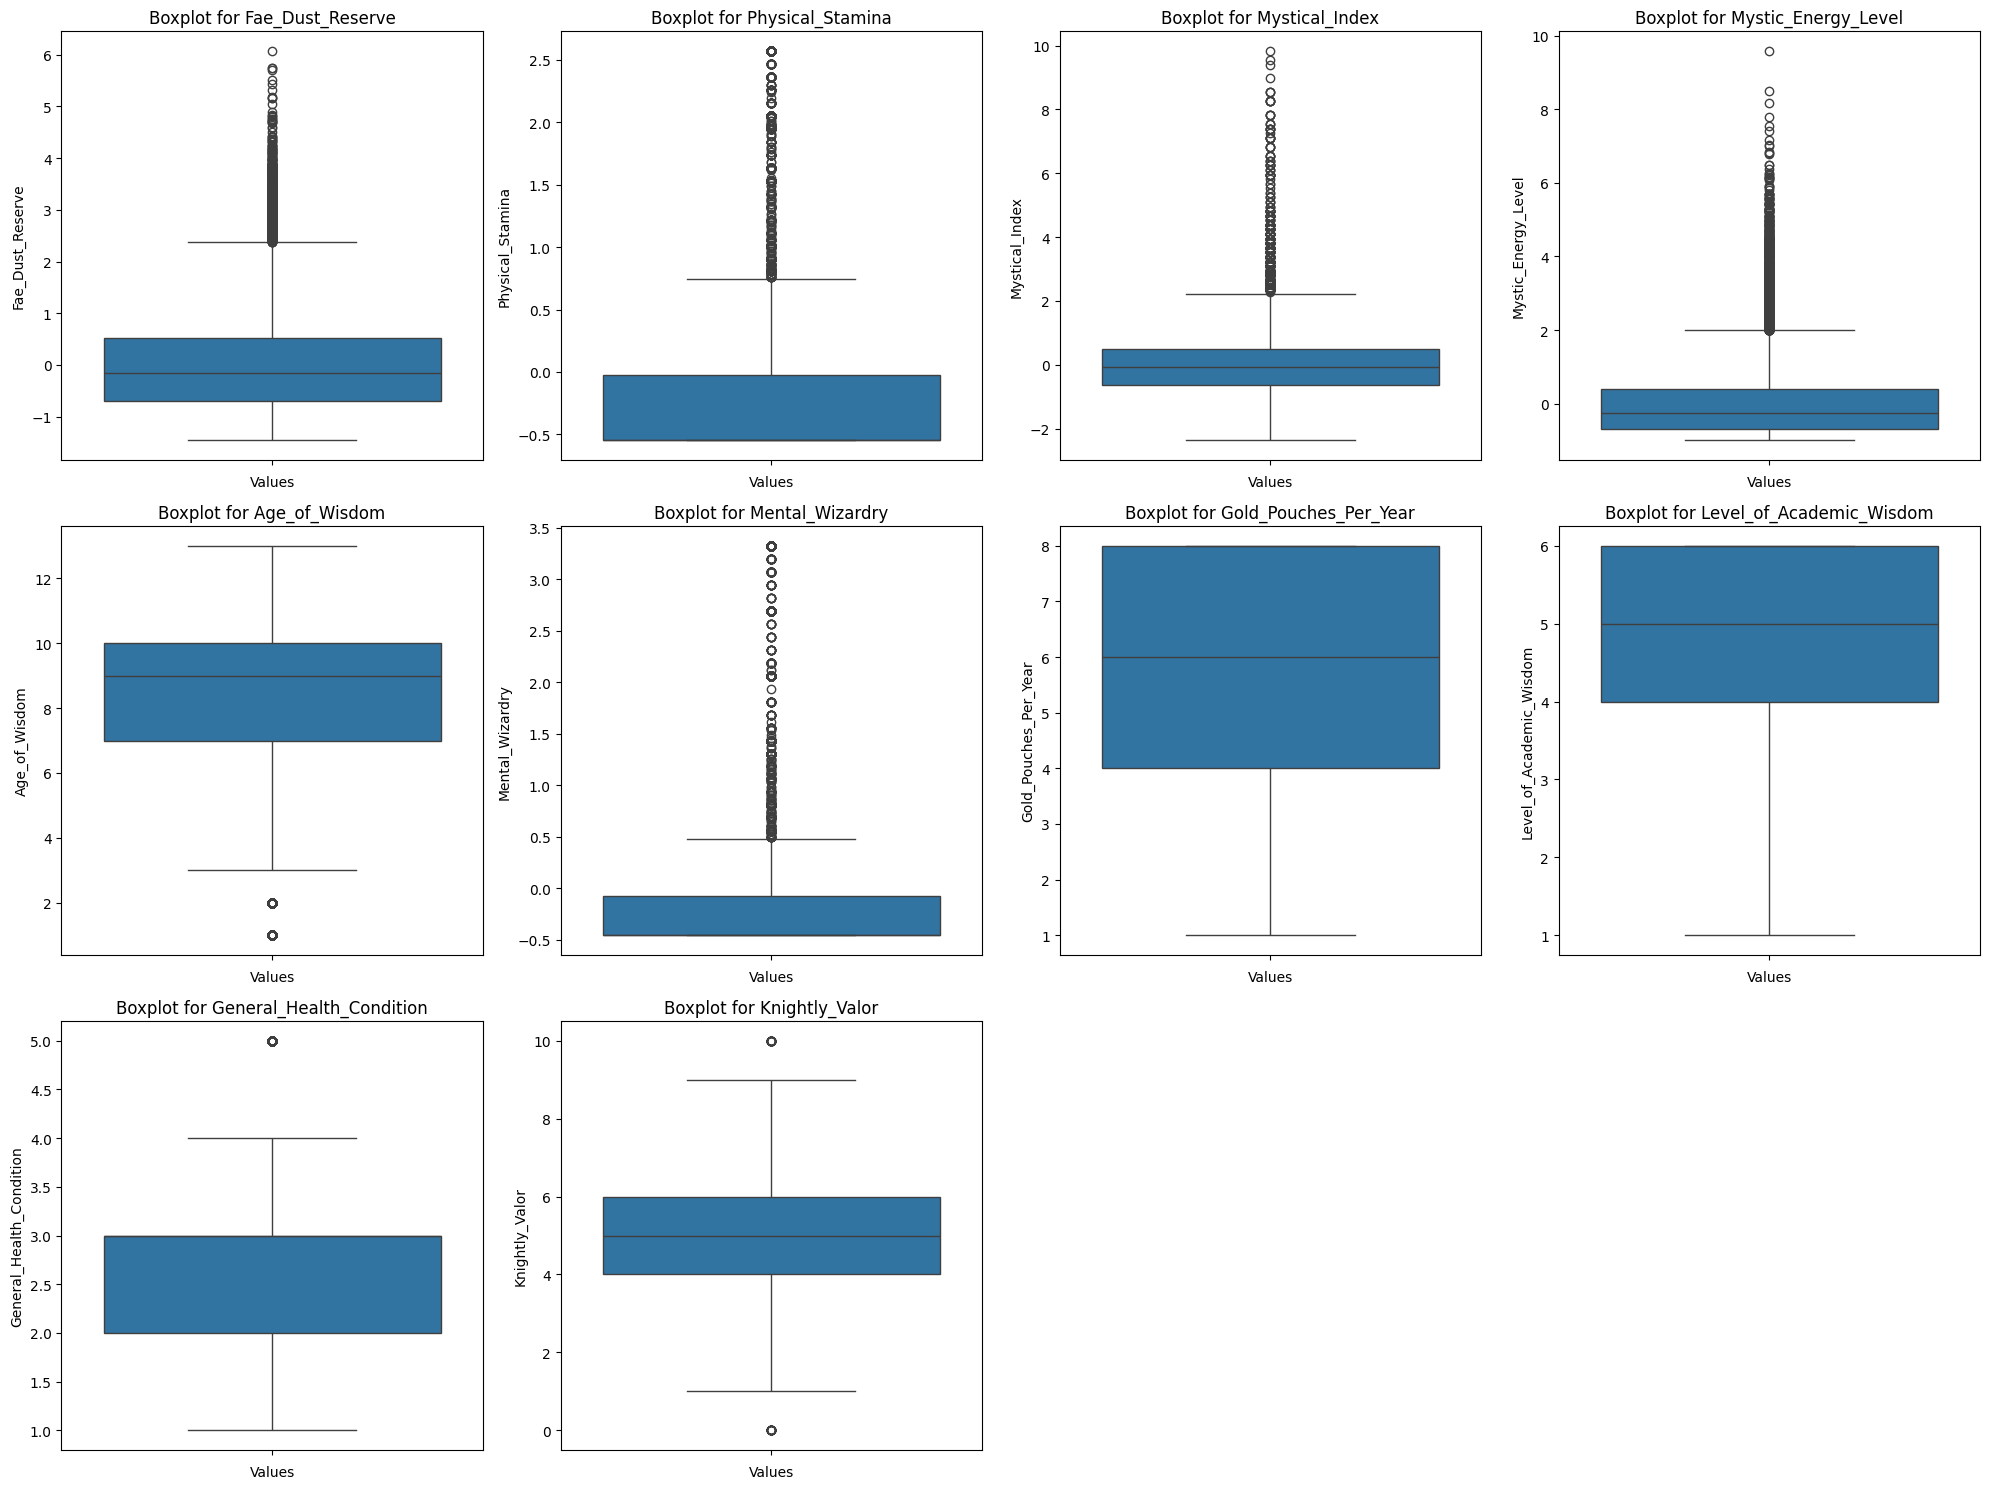

In [36]:
n_cols = 4 
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  
axes = axes.flatten() 

for i, column in enumerate(numerical_columns):
   
    Q1 = df_outliers[column].quantile(0.25)
    Q3 = df_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_outliers[(df_outliers[column] < lower_bound) | (df_outliers[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    
    sns.boxplot(data=df_outliers, y=column, ax=axes[i])  
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Observations

1. **Features with High Outliers:**
   - **Physical_Stamina:** 5,372 outliers, suggesting significant variance and extreme values.
   - **Mental_Wizardry:** 4,528 outliers, indicating heavy-tailed distribution or extreme deviations.
   - **General_Health_Condition:** 2,020 outliers, reflecting variability in health conditions.
   - **Mystic_Energy_Level:** 1,456 outliers, showing moderate outlier presence.

2. **Features with Moderate Outliers:**
   - **Fae_Dust_Reserve:** 745 outliers, indicating some skewness in the distribution.
   - **Mystical_Index:** 772 outliers, suggesting some degree of variance.
   - **Age_of_Wisdom:** 1,069 outliers, likely due to a wider age distribution.

3. **Features with Few or No Outliers:**
   - **Gold_Pouches_Per_Year:** No outliers, indicating a stable and well-contained distribution.
   - **Level_of_Academic_Wisdom:** No outliers, reflecting consistent academic levels across samples.
   - **Knightly_Valor:** Only 50 outliers, indicating minimal variance or deviation.


### 4.2 Handling Outliers

Our thought process behing choosing our method of handling outliers: 
- **Outlier Mitigation:**
  - Capping outliers prevents extreme values from distorting the data while retaining them within reasonable bounds.
- **Visual Verification:**
  - Boxplots provide a clear view of the updated distributions, ensuring that capping has effectively reduced outlier influence.
- **Perserving Data Integrity:**
  - Unlike removing outliers, capping maintains the dataset size and avoids data loss.


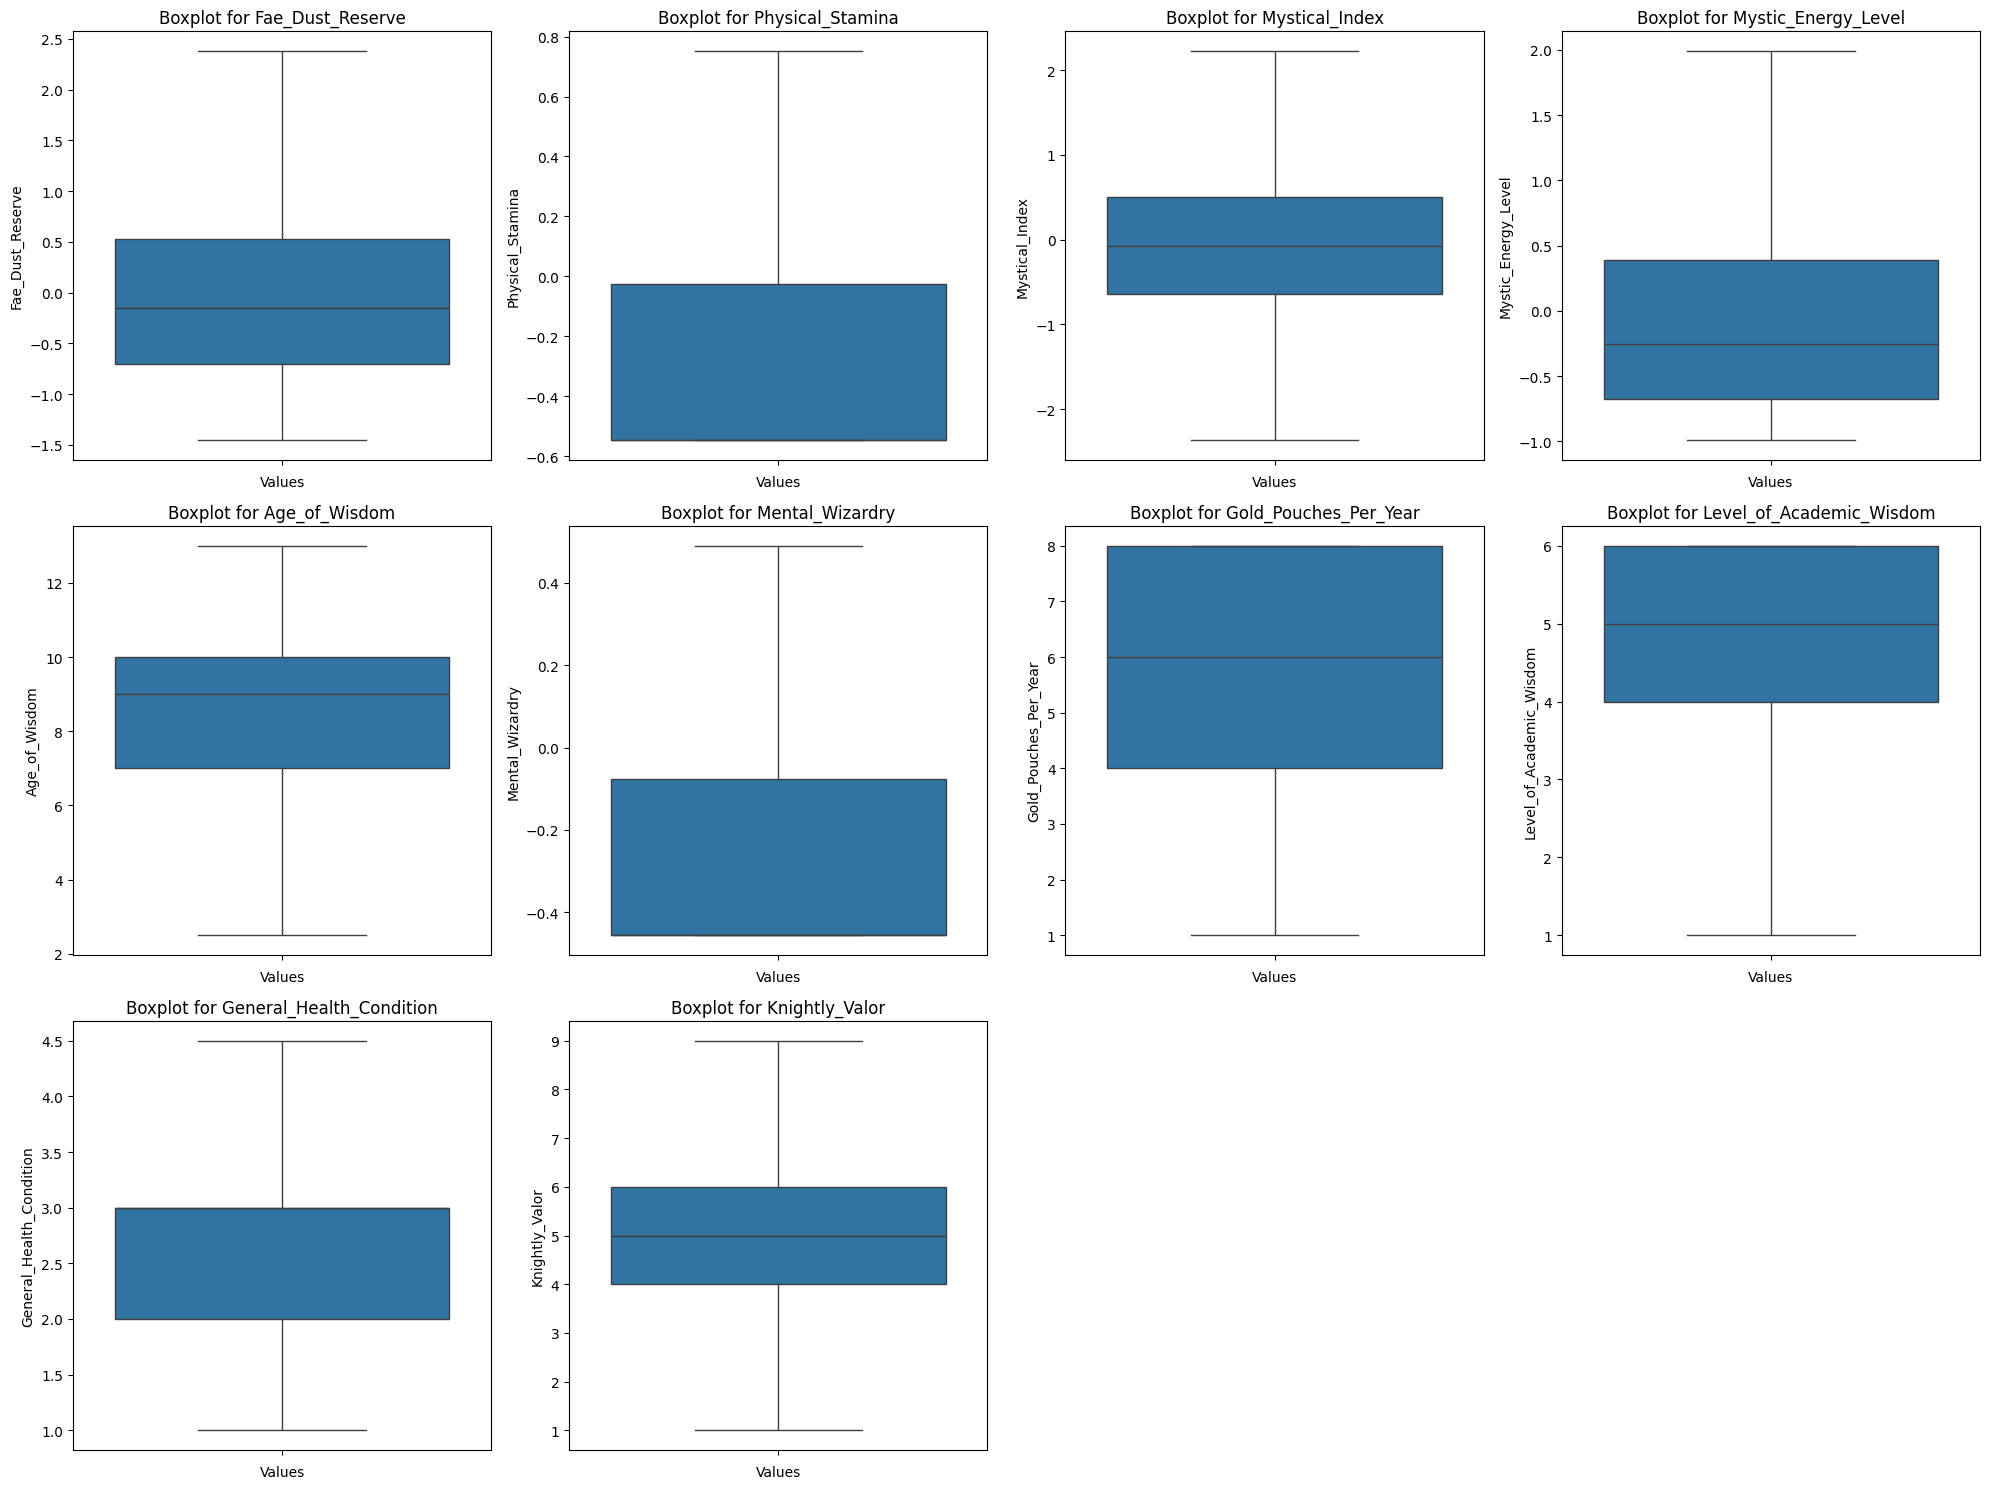

In [37]:
for column in numerical_columns:
    Q1 = df_balanced[column].quantile(0.25)
    Q3 = df_balanced[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_balanced[column] = df_balanced[column].clip(lower=lower_bound, upper=upper_bound)

n_cols = 4  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  
axes = axes.flatten()  

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df_balanced, y=column, ax=axes[i]) 
    axes[i].set_title(f'Boxplot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [38]:
df_balanced.describe()

Fae_Dust_Reserve  Physical_Stamina  Mystical_Index  \
count      31166.000000      31166.000000    31166.000000   
mean          -0.004369         -0.205987       -0.004514   
std            0.911820          0.503878        0.864837   
min           -1.454953         -0.547229       -2.366982   
25%           -0.703979         -0.547229       -0.643967   
50%           -0.154560         -0.547229       -0.069629   
75%            0.530688         -0.027318        0.504709   
max            2.382688          0.752548        2.227724   

       Elixir_veggies_consumption_Presence  Mystic_Energy_Level  \
count                         31166.000000         31166.000000   
mean                              0.806135            -0.028953   
std                               0.395331             0.809292   
min                               0.000000            -0.990506   
25%                               1.000000            -0.674687   
50%                               1.000000            -0.249584   
75%                               1.000000             0.392304   
max                               1.000000             1.992790   

       Bolt_of_doom_Presence  Age_of_Wisdom  High_willingness_Presence  \
count           31166.000000   31166.000000               31166.000000   
mean                0.050985       8.523984                   0.499679   
std                 0.219971       2.733575                   0.500008   
min                 0.000000       2.500000                   0.000000   
25%                 0.000000       7.000000                   0.000000   
50%                 0.000000       9.000000                   0.000000   
75%                 0.000000      10.000000                   1.000000   
max                 1.000000      13.000000                   1.000000   

       Defense_spell_difficulty_Presence  Mental_Wizardry  ...  \
count                       31166.000000     31166.000000  ...   
mean                            0.223096        -0.236809  ...   
std                             0.416329         0.355624  ...   
min                             0.000000        -0.455862  ...   
25%                             0.000000        -0.455862  ...   
50%                             0.000000        -0.455862  ...   
75%                             0.000000        -0.077602  ...   
max                             1.000000         0.489787  ...   

       Gold_Pouches_Per_Year  Level_of_Academic_Wisdom  \
count           31166.000000              31166.000000   
mean                5.782776                  4.949111   
std                 2.115132                  1.010411   
min                 1.000000                  1.000000   
25%                 4.000000                  4.000000   
50%                 6.000000                  5.000000   
75%                 8.000000                  6.000000   
max                 8.000000                  6.000000   

       General_Health_Condition  Knight_physical_training_Presence  \
count              31166.000000                       31166.000000   
mean                   2.714464                           0.723962   
std                    1.028785                           0.447043   
min                    1.000000                           0.000000   
25%                    2.000000                           0.000000   
50%                    3.000000                           1.000000   
75%                    3.000000                           1.000000   
max                    4.500000                           1.000000   

       Royal_family_pressure_Presence  Knightly_Valor  \
count                    31166.000000    31166.000000   
mean                         0.524642        4.988674   
std                          0.499400        1.514749   
min                          0.000000        1.000000   
25%                          0.000000        4.000000   
50%                          1.000000        5.000000   
75%                          1.000000 

After the handling of outliers, we would like to see the most relevant features with mostly likely the largest predictive relevance for our models.

In [39]:
feature_columns = [col for col in df_balanced.columns if col != 'Guild_Membership_encoded']
correlations = df_balanced[feature_columns].corrwith(df_balanced['Guild_Membership_encoded']).sort_values(ascending=False)
print("Feature correlations with Guild_Membership_encoded:")
print(correlations)


Feature correlations with Guild_Membership_encoded:
General_Health_Condition               0.309031
Royal_family_pressure_Presence         0.258795
High_willingness_Presence              0.228330
Mystical_Index                         0.226796
Age_of_Wisdom                          0.219066
Physical_Stamina                       0.189221
Defense_spell_difficulty_Presence      0.185402
Stigmata_of_the_cursed_Presence        0.130158
Mental_Wizardry                        0.092187
Dexterity_check_Presence               0.085712
Bolt_of_doom_Presence                  0.075473
Dragon_status_Presence                 0.057741
Knightly_Valor                        -0.000486
Mystic_Energy_Level                   -0.010918
Fae_Dust_Reserve                      -0.011750
Heavy_elixir_consumption_Presence     -0.050629
Elixir_veggies_consumption_Presence   -0.060497
Knight_physical_training_Presence     -0.112280
Level_of_Academic_Wisdom              -0.145431
Gold_Pouches_Per_Year               

Features with strong positive correlations, such as **General_Health_Condition** and **Royal_family_pressure_Presence**, are critical for predicting guild membership.

Weakly correlated features like **Knightly_Valor** and **Mystic_Energy_Level** may be less relevant and can potentially be excluded in modeling since they have a near-0 correlation.

### 4.3 Feature Distributions Across Guild Memberships

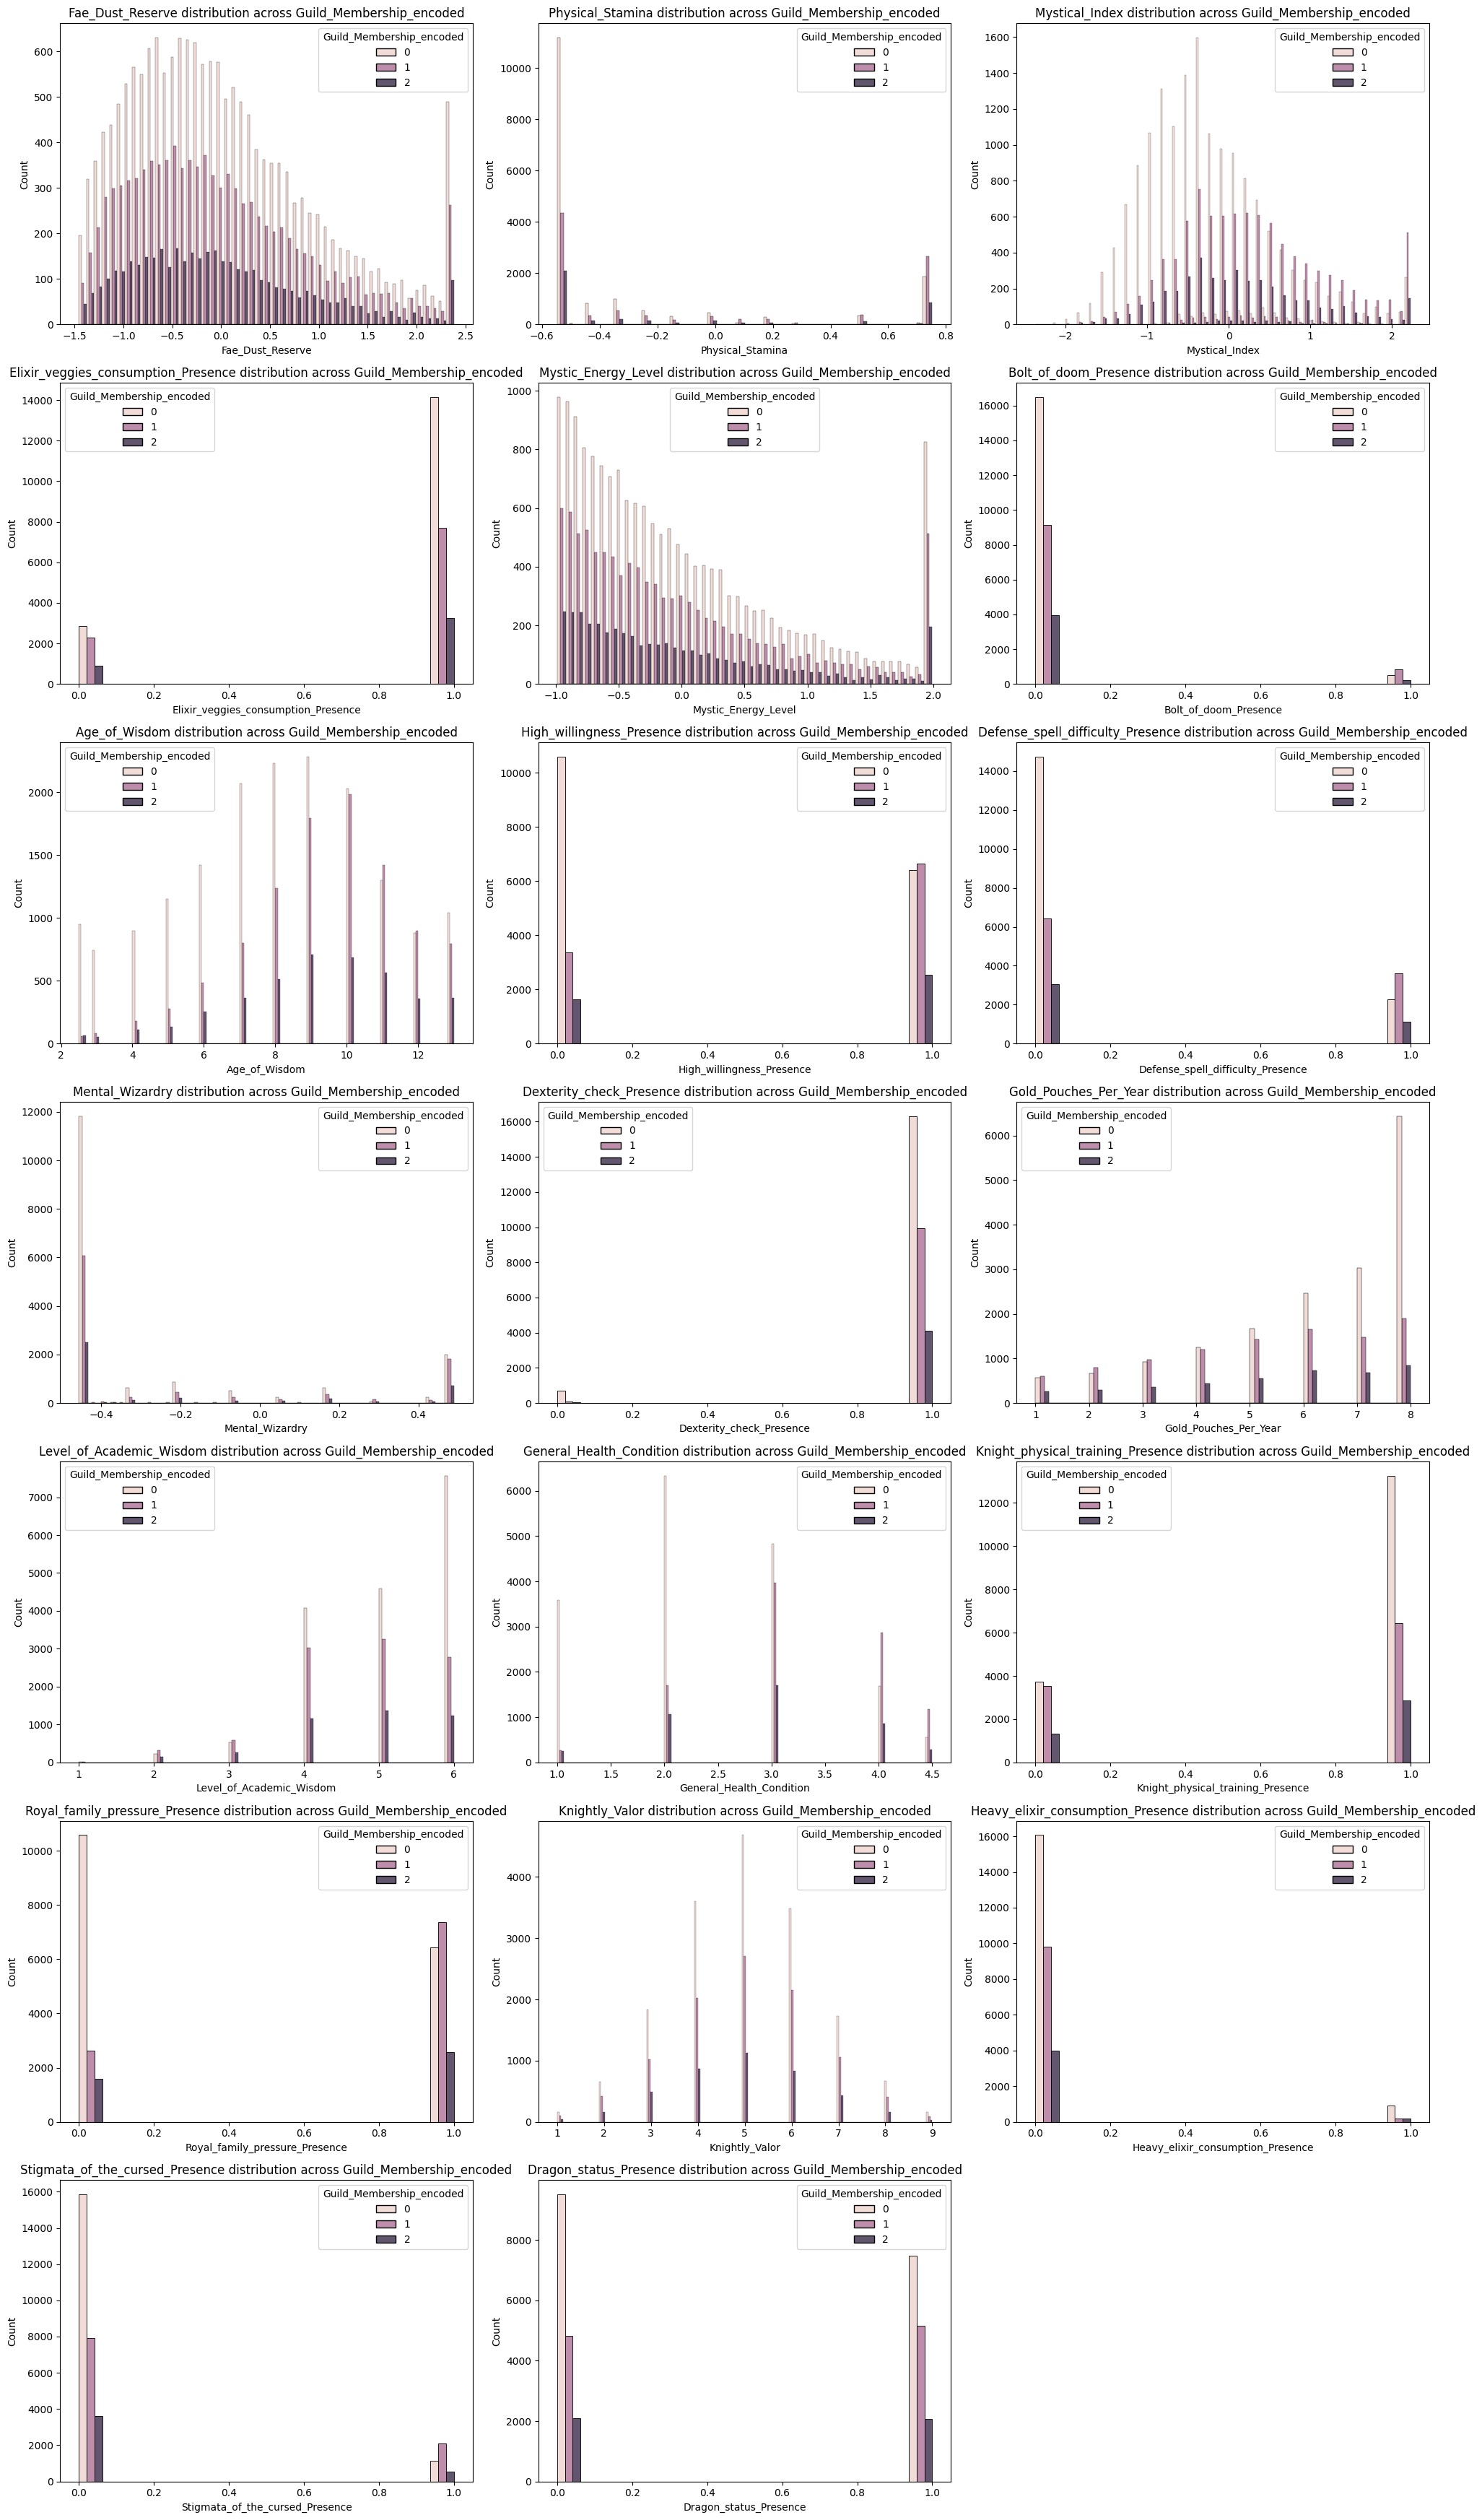

In [40]:
n_cols = 3 
n_rows = (len(feature_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  
axes = axes.flatten()  

for i, feature in enumerate(feature_columns):
    sns.histplot(data=df_balanced, x=feature, hue='Guild_Membership_encoded', multiple='dodge', ax=axes[i])
    axes[i].set_title(f'{feature} distribution across Guild_Membership_encoded')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Features with distinct and non-overlapping distributions, such as **Age_of_Wisdom** and **General_Health_Condition**, are likely to be strong predictors of guild membership.
- Features with significant overlap or low variability, such as **Knightly_Valor** or **Dexterity_check_Presence**, may require transformation or exclusion.
- Binary features with skewed distributions still provide guild-specific insights but may need further exploration for predictive modeling.

### 4.3 Heatmap Analysis
We explore feature relationships within each `Guild_Membership_encoded` class by plotting heatmaps of correlation matrices.

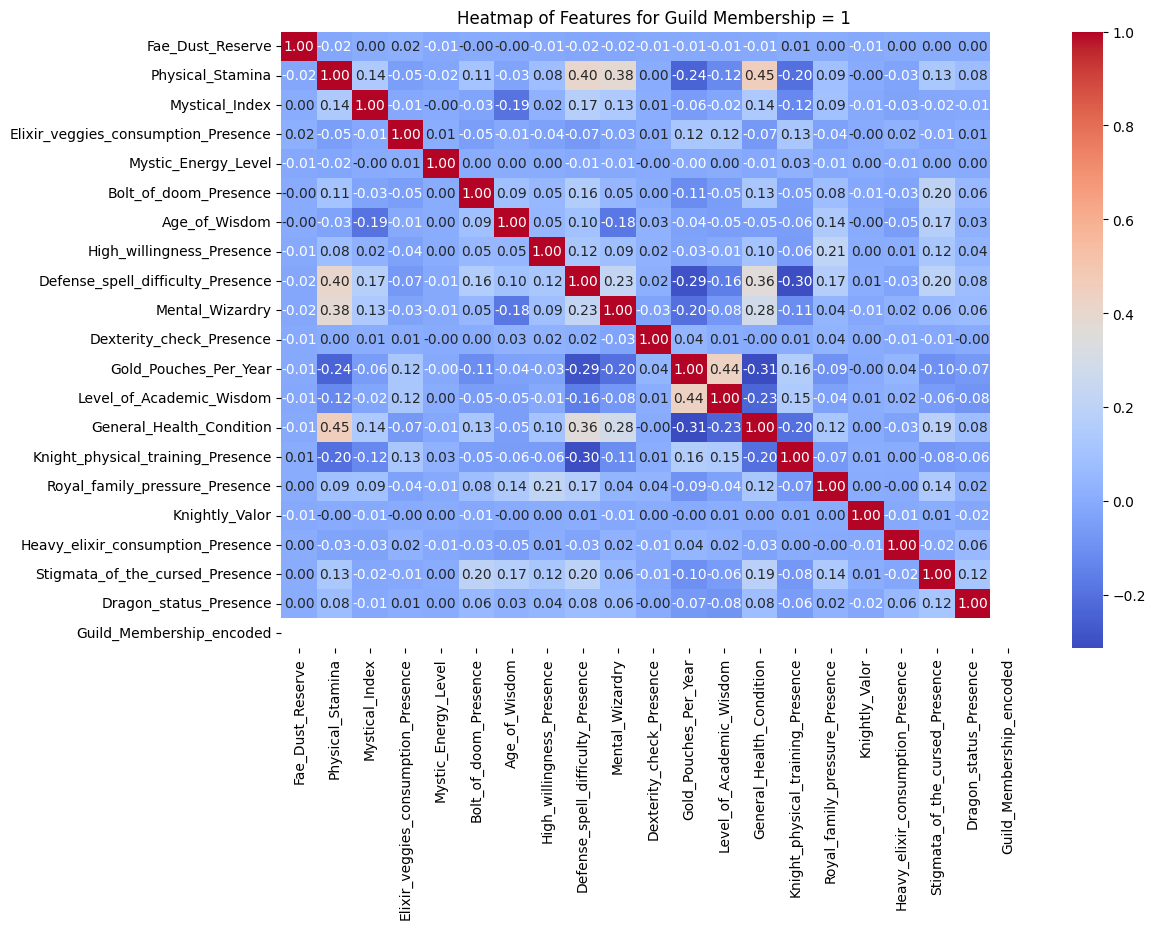

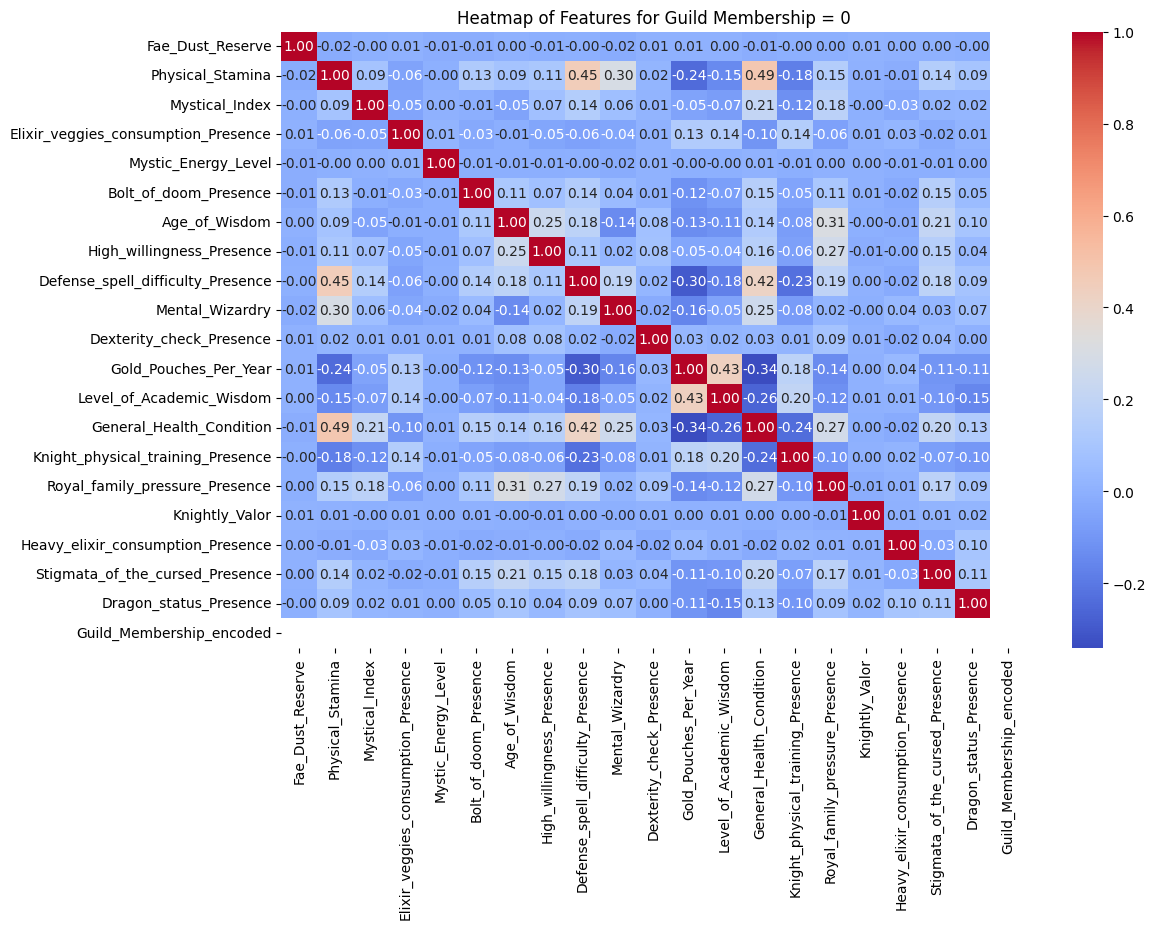

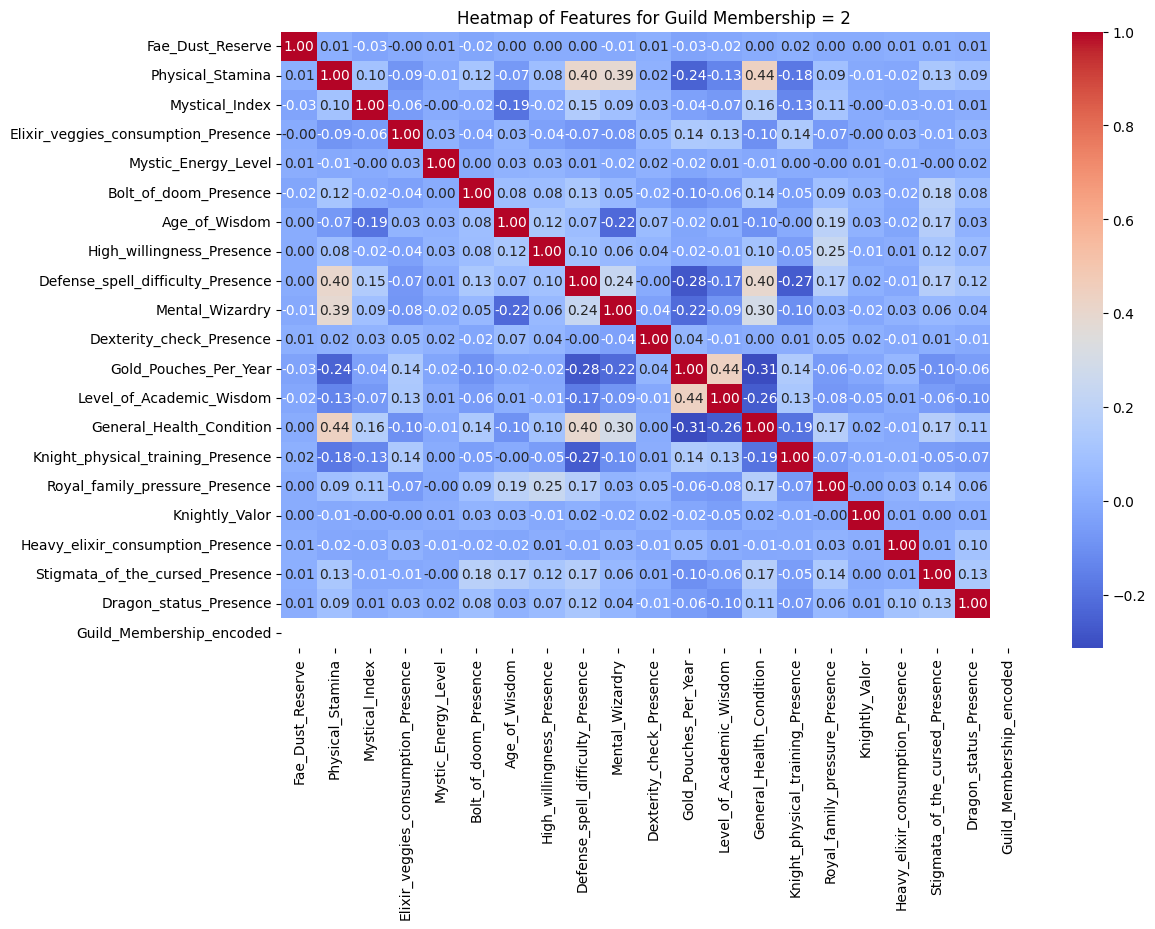

In [41]:
guilds = df_balanced['Guild_Membership_encoded'].unique()

for guild in guilds:
    guild_data = df_balanced[df_balanced['Guild_Membership_encoded'] == guild]
    
    correlation_matrix = guild_data.corr()
   
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f'Heatmap of Features for Guild Membership = {guild}')
    plt.show()


#### Most Relevant Features for Classification

##### From **No Guild (0)** to **Master Guild (1)**:
1. **Defense_spell_difficulty_Presence**
2. **General_Health_Condition**
3. **Physical_Stamina**
4. **Royal_family_pressure_Presence**

##### From **No Guild (0)** to **Apprentice Guild (2)**:
1. **Mystical_Index**
2. **Mystic_Energy_Level**
3. **Level_of_Academic_Wisdom**
4. **General_Health_Condition**

- **General_Health_Condition** and **Physical_Stamina** are critical for distinguishing both **Master** and **Apprentice Guilds**.
- Unique features like **Defense_spell_difficulty_Presence** (for Master Guild) and **Mystical_Index** (for Apprentice Guild) enhance guild-specific classification accuracy.
- Features with consistently weak correlations, such as **Knightly_Valor** and **Heavy_elixir_consumption_Presence**, can be deprioritized for modeling.

## 5. Data Splitting: Test and Trainig Data

We use the 80-20 split provides a balanced approach:
- **80% training data:** Maximizes learning potential for the model.
- **20% test data:** Ensures robust evaluation of the model's performance and generalization ability.

In [42]:
feature_columns = [col for col in df_balanced.columns if col != 'Guild_Membership_encoded']
X = df_balanced[feature_columns]  
y = df_balanced['Guild_Membership_encoded']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,  
    random_state=42,  
    stratify=y  
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (24932, 20)
X_test shape: (6234, 20)
y_train shape: (24932,)
y_test shape: (6234,)


80% training: 31166 × 0.8 = 24,932.2, rounded to 24,932.
20% testing: 31166 ×0.2 =6,233.8, rounded to 6,234.

X_train includes 20 features for each of the 31166 rows, so it is a 2-dimensional array, same as the X_test
So, X_train and X_test are 2D because they contain rows and columns of features.

In contrast, Y_train and y_test are 1D because they only contain the target labels.
Thus, appearing without a figure after the comma since it is only one column including the target variables.

### 5.1 Scaling the Data for Model Training and Testing

We standardized numerical features in the dataset for both training and testing sets, ensuring that all features have a consistent scale for better model performance.


In [43]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()  
X_test_scaled = X_test.copy()    

numerical_columns = [col for col in feature_columns if df_balanced[col].dtype in ['float64', 'int64']]
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("Scaled X_train sample:")
print(X_train_scaled[numerical_columns].head())

print("Scaled X_test sample:")
print(X_test_scaled[numerical_columns].head())


Scaled X_train sample:
       Fae_Dust_Reserve  Physical_Stamina  Mystical_Index  \
28534         -1.162043         -0.676744        2.424977   
334           -1.419675          1.900501       -1.071732   
7600           1.915920         -0.676744       -0.405692   
5051          -0.987271         -0.676744        0.659971   
10523         -0.390074         -0.676744        1.092897   

       Elixir_veggies_consumption_Presence  Mystic_Energy_Level  \
28534                             0.489423             0.447839   
334                              -2.043223             2.495677   
7600                              0.489423             0.097292   
5051                              0.489423            -1.118985   
10523                             0.489423            -0.445124   

       Bolt_of_doom_Presence  Age_of_Wisdom  High_willingness_Presence  \
28534              -0.228679      -0.195925                   1.004180   
334                -0.228679       1.634753                

In [44]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train,  
    test_size=0.20, # 20% is chosen for testing size         
    random_state=42,        
    stratify=y_train #indepednt from testing for validation matix       
)

print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train_final shape: {y_train_final.shape}")
print(f"y_val shape: {y_val.shape}")


X_train_final shape: (19945, 20)
X_val shape: (4987, 20)
y_train_final shape: (19945,)
y_val shape: (4987,)


- The scaled training set (`X_train_scaled`) is split further into:
     - **Training Set (`X_train_final`)**: Used for model training.
     - **Validation Set (`X_val`)**: Used for evaluating model performance during development.
   - The corresponding target variables (`y_train`) are split into `y_train_final` and `y_val`.


# Model Building

### Model Selection
Since our target variable, `Guild_Membership_encoded`, is categorical and we aim to predict guild membership (**Master Guild, or Apprentice Guild**), we are addressing a multi-class classification problem. The outcome is not binary but involves three possible categories.

To proceed, we analyze the following models:

- **Logistic Regression:**
A simple and interpretable model, effective for linearly separable data but may struggle with complex patterns.

- **Random Forest:**
An ensemble model that combines multiple decision trees, robust to overfitting and effective at capturing non-linear relationships.

- **Gradient Boosted Trees:**
A sequential ensemble model that iteratively improves predictions, highly accurate for complex data structures.

- **K-Nearest Neighbors (KNN):**
A distance-based model that relies on similarity between samples, suitable for smaller datasets but computationally expensive for larger ones.

## 6.1 Initial Testing Different Models

Training Gradient Boosted Trees...
Gradient Boosted Trees Accuracy: 0.6559
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      2720
           1       0.57      0.64      0.60      1600
           2       0.50      0.01      0.01       667

    accuracy                           0.66      4987
   macro avg       0.59      0.49      0.46      4987
weighted avg       0.63      0.66      0.61      4987

Gradient Boosted Trees Training Time: 6.43 seconds

Training Random Forest...
Random Forest Accuracy: 0.6423
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      2720
           1       0.56      0.60      0.58      1600
           2       0.26      0.01      0.02       667

    accuracy                           0.64      4987
   macro avg       0.50      0.48      0.45      4987
weighted avg       0.59      0.64      0.60      4987

Random Forest Training Time: 1.71 seconds

Training Lo

/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

K-Nearest Neighbors Accuracy: 0.6078
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      2720
           1       0.53      0.51      0.51      1600
           2       0.18      0.04      0.06       667

    accuracy                           0.61      4987
   macro avg       0.46      0.45      0.43      4987
weighted avg       0.55      0.61      0.57      4987

K-Nearest Neighbors Training Time: 0.00 seconds



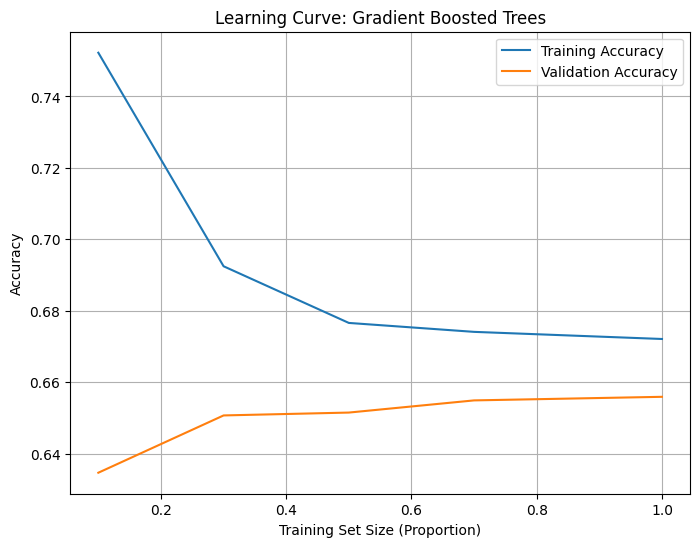

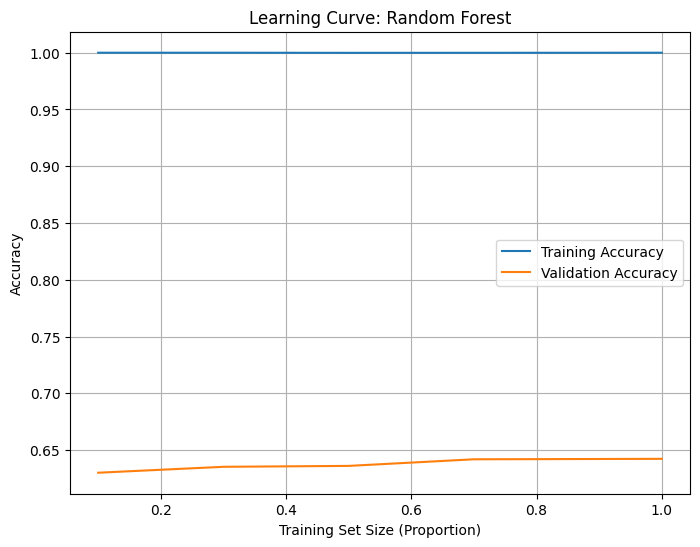

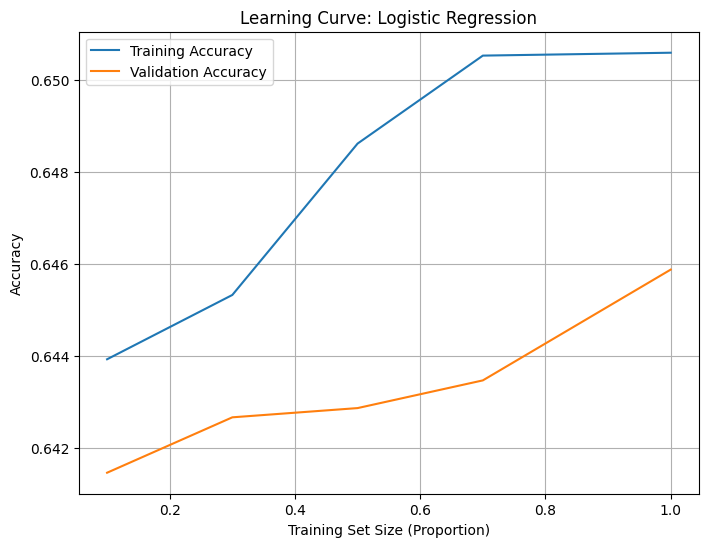

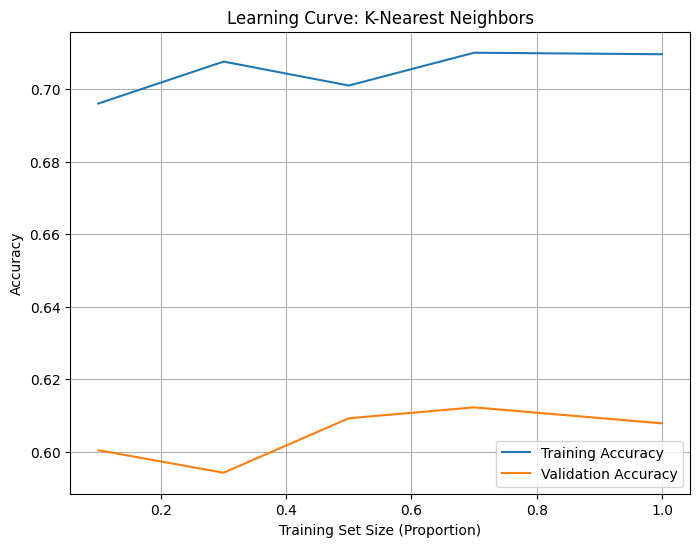

Results for All Models:
Gradient Boosted Trees - Accuracy: 0.6559, Runtime: 6.43 seconds
Random Forest - Accuracy: 0.6423, Runtime: 1.71 seconds
Logistic Regression - Accuracy: 0.6459, Runtime: 0.03 seconds
K-Nearest Neighbors - Accuracy: 0.6078, Runtime: 0.00 seconds


In [45]:
models = {
    "Gradient Boosted Trees": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),

}
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    
    model.fit(X_train_final, y_train_final)
    end_time = time.time()
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    results[model_name] = {"accuracy": accuracy, "runtime": end_time - start_time}
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))
    print(f"{model_name} Training Time: {end_time - start_time:.2f} seconds\n")

def plot_learning_curve(model, model_name):
    train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
    train_scores = []
    val_scores = []
    
    for size in train_sizes:
       
        X_sample = X_train_final[:int(size * len(X_train_final))]
        y_sample = y_train_final[:int(size * len(y_train_final))]
        
        model.fit(X_sample, y_sample)
        
        train_scores.append(model.score(X_sample, y_sample))
        val_scores.append(model.score(X_val, y_val))
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label="Training Accuracy")
    plt.plot(train_sizes, val_scores, label="Validation Accuracy")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

for model_name, model in models.items():
    plot_learning_curve(model, model_name)

print("Results for All Models:")
for model_name, metrics in results.items():
    print(f"{model_name} - Accuracy: {metrics['accuracy']:.4f}, Runtime: {metrics['runtime']:.2f} seconds")



- **Gradient Boosted Trees**:
  - Achieved the highest accuracy, demonstrating its ability to handle complex patterns. However, it had the longest runtime due to the iterative nature of boosting.
  - Most efficient

- **Random Forest**:
  - Delivered good accuracy and faster runtime compared to Gradient Boosted Trees, making it a balanced option between performance and efficiency.
  - 3rd rank efficient

- **Logistic Regression**:
  - Despite its simplicity, it performed comparably to Random Forest. It is computationally efficient but may struggle with non-linear patterns.
  - 2nd rank efficient

- **K-Nearest Neighbors (KNN)**:
  - The lowest accuracy among the models, suggesting it is less suited for handling the complexity of this dataset.
  - Least efficient


## 6.2 Resampling

### 6.2.1 Resampling for Balanced Classes

We address class imbalance in the training dataset by oversampling **Class 2 (Apprentice Guild)**, ensuring better representation and improving model performance.

In [46]:
train_data = pd.concat([X_train, y_train], axis=1)

class_2 = train_data[train_data['Guild_Membership_encoded'] == 2]
other_classes = train_data[train_data['Guild_Membership_encoded'] != 2]

class_2_oversampled = resample(
    class_2,
    replace=True,             
    n_samples=len(class_2) + 1000,  
    random_state=42    
)

train_data_oversampled = pd.concat([other_classes, class_2_oversampled])

train_data_oversampled = train_data_oversampled.sample(frac=1, random_state=42)

X_train_oversampled = train_data_oversampled.drop(columns=['Guild_Membership_encoded'])
y_train_oversampled = train_data_oversampled['Guild_Membership_encoded']

print("Class distribution after oversampling:")
print(Counter(y_train_oversampled))

print(f"X_train_oversampled shape: {X_train_oversampled.shape}")
print(f"y_train_oversampled shape: {y_train_oversampled.shape}")


Class distribution after oversampling:
Counter({0: 13599, 1: 8000, 2: 4333})
X_train_oversampled shape: (25932, 20)
y_train_oversampled shape: (25932,)


In [47]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_oversampled, 
    y_train_oversampled, 
    test_size=0.20,       
    random_state=42,    
    stratify=y_train_oversampled  
)

print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train_final shape: {y_train_final.shape}")
print(f"y_val shape: {y_val.shape}")


X_train_final shape: (20745, 20)
X_val shape: (5187, 20)
y_train_final shape: (20745,)
y_val shape: (5187,)


#### To go forward with hyperparameter tuning for our models we chose 2 to move foward with:
#### 1. Random Forest
Eventhough 3rd most accurat in the intial traning and validation of models, it performed comarable to Logistic regression whilst being less computationally expensive than GBTs. Additionally, Random forest models are more robust so would be an advanatge againgst the linear startegy of Logistic Regression.
#### 2. Logistic Regression
This was the 2nd most accurate model when it comes to validation after GBTs. Additionally, the run time is especially fast for this model.
##### Why KNN and GBT were not chosen?
Firstly, KNN was the least accurate of all models and consistent performed the worst out of them all. Secondly, GBTs were excluded because in our attemts to hyperparameter tune it in the early versions of our project, it was evident that GBTs were too computationally expensive resulting in long run times which is not desiable for our project. Thus, we proceed to choose the best two models from our reasoning to hyperparameter tune and give our evalute them against eachother.

## 6.3 Hyperparameter Tunning



We decided to approach cross-validation, using Randomized Search followed by Grid Search for hyperparameter tuning. This approach balances the need for exploring a wide range of options (Randomized Search) with the need for finding the optimal combination in a focused range (Grid Search), leading to a more efficient and effective model tuning.

### 6.3.1) Random Forest 


### Randomized Search for Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

# Define parameter distribution for Randomized Search
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Randomized Search
random_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True
)

# Perform Randomized Search
print("Running Randomized Search for Random Forest...")
start_time = time.time()
random_rf.fit(X_train_final, y_train_final)
end_time = time.time()

# Extract and print the best parameters and score
best_params = random_rf.best_params_
best_score = random_rf.best_score_

print("\nBest Parameters from Randomized Search:", best_params)
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Randomized Search Training Time: {end_time - start_time:.2f} seconds\n")


Running Randomized Search for Random Forest...

Best Parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Cross-Validation Score: 0.7093
Randomized Search Training Time: 87.05 seconds



#### Choosing Hyperparameters for Grid Search
For the Grid Search, a refined search space was chosen based on the results of Randomized Search:

1. `n_estimators`:
    - Randomized Search suggested 100 as optimal, but Grid Search tested slightly higher values (150 and 200).

2. `max_depth`:
    - None allows the tree to grow fully; Randomized Search identified a limit of 20 as promising.

3. `max_features`:
    - log2 was identified as a good balance between randomness and model performance.

4. `min_samples_split`:
    - Randomized Search suggested values above the default (e.g., 5), so Grid Search refined this to 4.

5. `min_samples_leaf`:
    - Randomized Search suggested 1, indicating no need for further refinement.


### Grid Search for Random Forest

In [49]:
from sklearn.model_selection import GridSearchCV

# Define grid based on Randomized Search results
rf_param_grid = {
    'n_estimators': [
        max(10, best_params['n_estimators'] - 50),
        best_params['n_estimators'],
        best_params['n_estimators'] + 50
    ],
    'max_depth': [
        max(1, (best_params['max_depth'] - 10) if best_params['max_depth'] else 1),
        best_params['max_depth'],
        None
    ],
    'min_samples_split': [
        max(2, best_params['min_samples_split'] - 1),
        best_params['min_samples_split'],
        best_params['min_samples_split'] + 1
    ],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1),
        best_params['min_samples_leaf'],
        best_params['min_samples_leaf'] + 1
    ],
    'max_features': [best_params['max_features']]
}

# Grid Search
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True
)

# Perform Grid Search
print("Running Grid Search for Random Forest...")
start_time = time.time()
grid_rf.fit(X_train_final, y_train_final)
end_time = time.time()

grid_best_params = grid_rf.best_params_
grid_best_score = grid_rf.best_score_

print("\nBest Parameters from Grid Search:", grid_best_params)
print(f"Best Cross-Validation Score: {grid_best_score:.4f}")
print(f"Grid Search Training Time: {end_time - start_time:.2f} seconds\n")


Running Grid Search for Random Forest...

Best Parameters from Grid Search: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Best Cross-Validation Score: 0.7172
Grid Search Training Time: 126.40 seconds



- After Grid Search the cross validation score increases as GRid Search explores all possible combinations for better parameters.
- Randomized Search was faster however we belive the higher cross-validation score in Grid Search is a good trade off making it out way to obtain the best mmodel parameters.

### 6.3.2) Logistic Regression 


### Randomized Search for Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time

# Define parameter distribution for Randomized Search
lr_param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Solvers
    'max_iter': [100, 200, 500, 1000]  # Maximum iterations for convergence
}

# Randomized Search
random_lr = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=lr_param_dist,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  
    scoring='accuracy',  
    return_train_score=True
)

# Perform Randomized Search
print("Running Randomized Search for Logistic Regression...")
start_time = time.time()
random_lr.fit(X_train_final, y_train_final)
end_time = time.time()


best_params_lr = random_lr.best_params_
best_score_lr = random_lr.best_score_

print("\nBest Parameters from Randomized Search:", best_params_lr)
print(f"Best Cross-Validation Score: {best_score_lr:.4f}")
print(f"Randomized Search Training Time: {end_time - start_time:.2f} seconds\n")


Running Randomized Search for Logistic Regression...


/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/elinayil


Best Parameters from Randomized Search: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'C': 10}
Best Cross-Validation Score: 0.6244
Randomized Search Training Time: 6.82 seconds



### Grid Search for Logistic Regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

# Define parameter grid for Logistic Regression
lr_param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [100, 500, 1000]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 500, 1000]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [100, 500, 1000]}
]

# Grid Search
grid_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=lr_param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available processors
    scoring='accuracy',  # Accuracy as the metric
    return_train_score=True,
    error_score='raise'  # Raise errors during fitting
)

# Perform Grid Search
print("Running Grid Search for Logistic Regression...")
start_time = time.time()
grid_lr.fit(X_train_final, y_train_final)
end_time = time.time()

# Extract and print the best parameters and score
best_params_lr = grid_lr.best_params_
best_score_lr = grid_lr.best_score_

print("\nBest Parameters from Grid Search:", best_params_lr)
print(f"Best Cross-Validation Score: {best_score_lr:.4f}")
print(f"Grid Search Training Time: {end_time - start_time:.2f} seconds\n")


Running Grid Search for Logistic Regression...


/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User


Best Parameters from Grid Search: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Score: 0.6246
Grid Search Training Time: 118.67 seconds



#### Choosing Hyperparameters for Grid Search
These are the refined Grid Search parameters based on Randomized Search:

1. `C `(Inverse Regularization Strength):
    -  Randomized Search identified `C`=10, favoring stronger regularization. Grid Search tested a wider range, identifying `C`=0.1 as optimal.

2. `max_iter`:
    - Randomized Search used 500 iterations to converge, while Grid Search optimized to 100 iterations, balancing time and convergence.

3. `penalty`:
    - Both searches agreed on `l2` penalty, which is standard for dense datasets.

4. `solver:`
    - randomized Search selected `lbfgs`, while Grid Search preferred `saga`, which supports both `l1` and `l2 ` penalties and is better suited for larger datasets.

There is a slight improvement in with the Grid Seach cross Validation score. With the same reasons listed for Random Forest, we wil use Grid Search for training the models.

## 6.4 Training the models after Hyperparameter Tunning

Training Random Forest with best parameters...
Random Forest Accuracy: 0.7284
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2720
           1       0.61      0.63      0.62      1600
           2       0.98      0.65      0.78       867

    accuracy                           0.73      5187
   macro avg       0.78      0.70      0.73      5187
weighted avg       0.74      0.73      0.73      5187

Random Forest Training Time: 3.15 seconds

Training Logistic Regression with best parameters...
Logistic Regression Accuracy: 0.6206
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      2720
           1       0.53      0.61      0.57      1600
           2       0.00      0.00      0.00       867

    accuracy                           0.62      5187
   macro avg       0.40      0.48      0.44      5187
weighted avg       0.52      0.62      0.56      5187

Logistic Regression Trainin

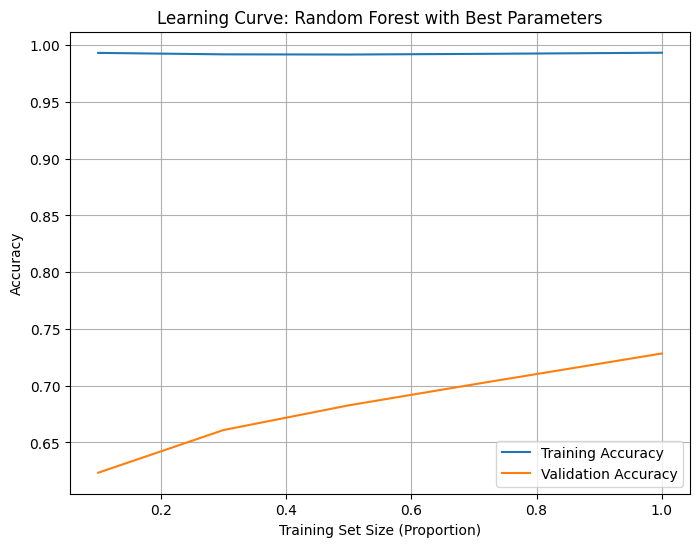

/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/elinayilmaz/Library/Python/3.12/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


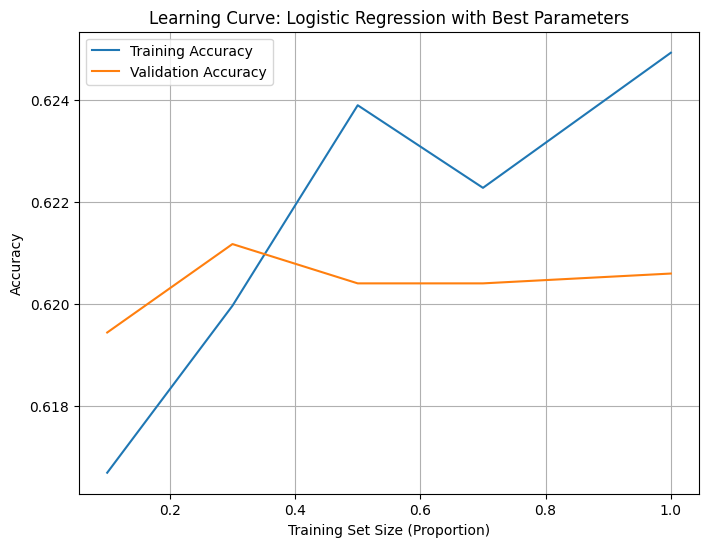


Summary of Results for All Models with Best Parameters:
Random Forest:
  - Accuracy: 0.7284
  - Runtime: 3.15 seconds
Logistic Regression:
  - Accuracy: 0.6206
  - Runtime: 0.30 seconds


In [52]:
from sklearn.metrics import accuracy_score, classification_report


models_with_best_params = {
    "Random Forest": RandomForestClassifier(
        n_estimators=150,  # From Grid Search
        max_depth=None, 
        min_samples_split=4, 
        min_samples_leaf=1, 
        max_features='log2', 
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        solver='saga',  # From Grid Search
        penalty='l2', 
        max_iter=100, 
        C=0.1, 
        random_state=42
    )
}

# Dictionary to store results
results_with_best_params = {}


for model_name, model in models_with_best_params.items():
    print(f"Training {model_name} with best parameters...")

    start_time = time.time()

    model.fit(X_train_final, y_train_final)

    end_time = time.time()

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy and runtime
    accuracy = accuracy_score(y_val, y_val_pred)
    runtime = end_time - start_time

    results_with_best_params[model_name] = {"accuracy": accuracy, "runtime": runtime}

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))
    print(f"{model_name} Training Time: {runtime:.2f} seconds\n")

def plot_learning_curve_best(model, model_name):
    train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
    train_scores = []
    val_scores = []

    for size in train_sizes:
        # Sample a portion of the training data
        X_sample = X_train_final[:int(size * len(X_train_final))]
        y_sample = y_train_final[:int(size * len(y_train_final))]

        # Train the model
        model.fit(X_sample, y_sample)

        # Evaluate on both sets
        train_scores.append(model.score(X_sample, y_sample))
        val_scores.append(model.score(X_val, y_val))

#Sisualizations
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label="Training Accuracy")
    plt.plot(train_sizes, val_scores, label="Validation Accuracy")
    plt.title(f"Learning Curve: {model_name} with Best Parameters")
    plt.xlabel("Training Set Size (Proportion)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

for model_name, model in models_with_best_params.items():
    plot_learning_curve_best(model, model_name)

#Written Summary
print("\nSummary of Results for All Models with Best Parameters:")
for model_name, metrics in results_with_best_params.items():
    print(f"{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy']:.4f}")
    print(f"  - Runtime: {metrics['runtime']:.2f} seconds")


After Hyperparameter Tuning we can already see imporvement in accuracy results from the inital model training section.

- Random Forest's accuracy significantly imporoves from **0.6423 to 0.7284**.
- Logistic Regression's accuracy decreases from **0.6459 to 0.6206**.

Naturally, the runtime for both models slightly increas after tuning due to the added complexities and parameters involved in the training.

## 6.5 Evaluating the Models

**AUC**: Measures the model's ability to distinguish between positive and negative classes.
- **1.0 (Perfect Model):** The model perfectly separates all classes.
- **0.5 (Random Guess)**: The model performs no better than random guessing.
- **< 0.5:** The model performs worse than random guessing.

Evaluating Random Forest...


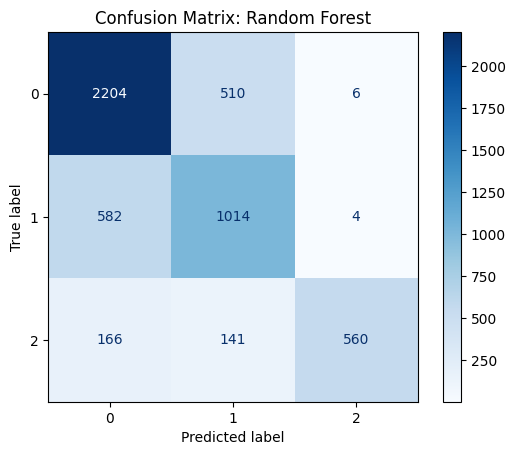

Random Forest Macro-AUC: 0.8448

Evaluating Logistic Regression...


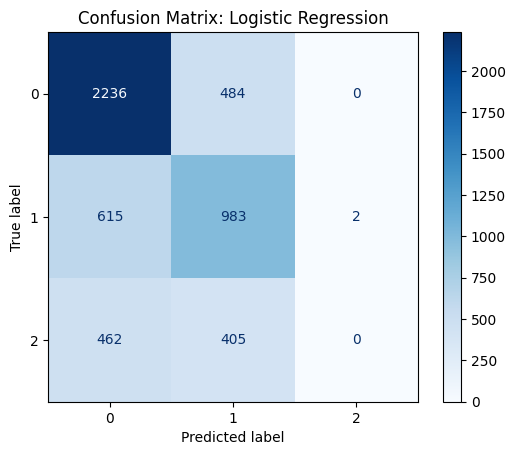

Logistic Regression Macro-AUC: 0.7337



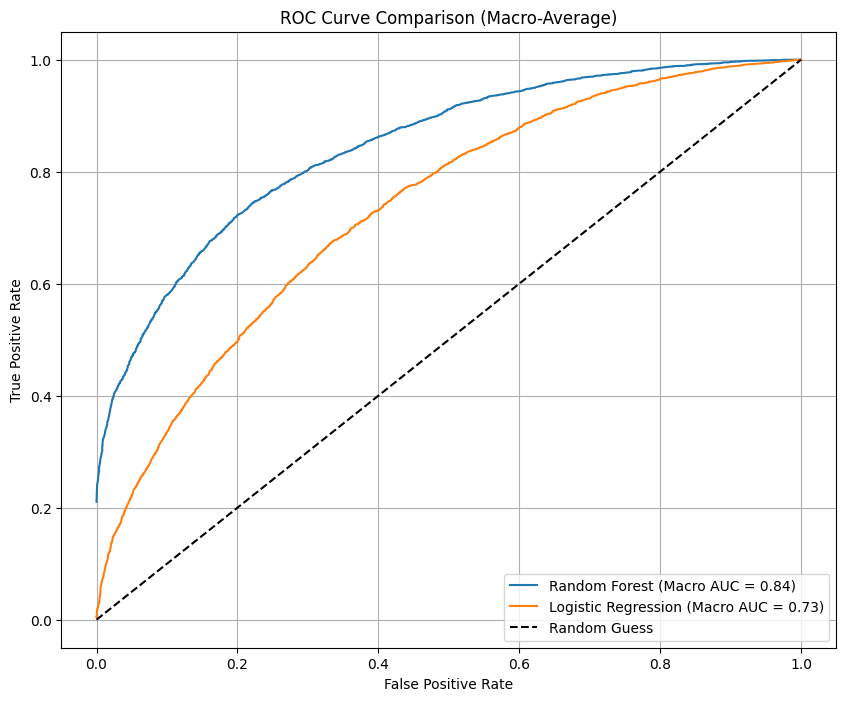

In [53]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import numpy as np

# Dictionary to store ROC curve data
roc_curves = {}

# Evaluate models
for model_name, model in models_with_best_params.items():
    print(f"Evaluating {model_name}...")

    # Predict probabilities for ROC curve
    y_val_proba = model.predict_proba(X_val)

    # Confusion Matrix
    y_val_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train_final))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    # ROC Curve (One-vs-All for multi-class classification)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(np.unique(y_train_final))):  # For each class
        fpr[i], tpr[i], _ = roc_curve(y_val == i, y_val_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute macro-average ROC curve and AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(fpr))]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(len(fpr)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= len(fpr)
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Store ROC curve data
    roc_curves[model_name] = (fpr["macro"], tpr["macro"], roc_auc["macro"])

    # Print Macro AUC
    print(f"{model_name} Macro-AUC: {roc_auc['macro']:.4f}\n")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, (fpr_macro, tpr_macro, roc_auc_macro) in roc_curves.items():
    plt.plot(fpr_macro, tpr_macro, label=f"{model_name} (Macro AUC = {roc_auc_macro:.2f})")

# Add random guess line
plt.plot([0, 1], [0, 1], color="black", linestyle="--", label="Random Guess")

# Plot details
plt.title("ROC Curve Comparison (Macro-Average)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1. #### Random Forest
- **Macro-AUC:** **0.8448**: We can see a stong performance- this high score indicates that the model correctly ranks positive occurances higher than negative ones on average.
- **Curve Shape:**
The curve is closer to the top-left corner of the plot, indicating high sensitivity (**True Positive Rate**) at lower False Positive Rates.
- **Performance**:
The evaluation shows that Random Forest is a robust ML model that leverages multiple decision trees, capturing complex patterns in the data, which leads to **superior performance compared to Logistic Regression**.
2. #### Logistic Regression
- **Macro-AUC:** **0.7337**: This suggests moderate performance, with the model ranking positive instances higher than negative ones on average.
- **Curve Shape:**
The curve is less steep and farther from the top-left corner compared to Random Forest, indicating lower sensitivity at equivalent False Positive Rates.
- **Performance:**
The results indicated that logistic Regression performs well for linearly separable data but struggles with complex patterns. The models' stuggle is also seen in hyperparameter tuning section.

### 6.5.2 Hyperparameter Sensitivity Analysis: Random Forest

We analyze the paramaters obtained from the cross-examination for Random forest in the previous sections( Randomized/ Grid Search). This is important as to visualise how changes in these hyperparameters impact the model's training and test scores. 

The key hyperparameters:
- `n_estimators`: The number of decision trees in the Random Forest.
- `max_depth`: The maximum depth of each tree.

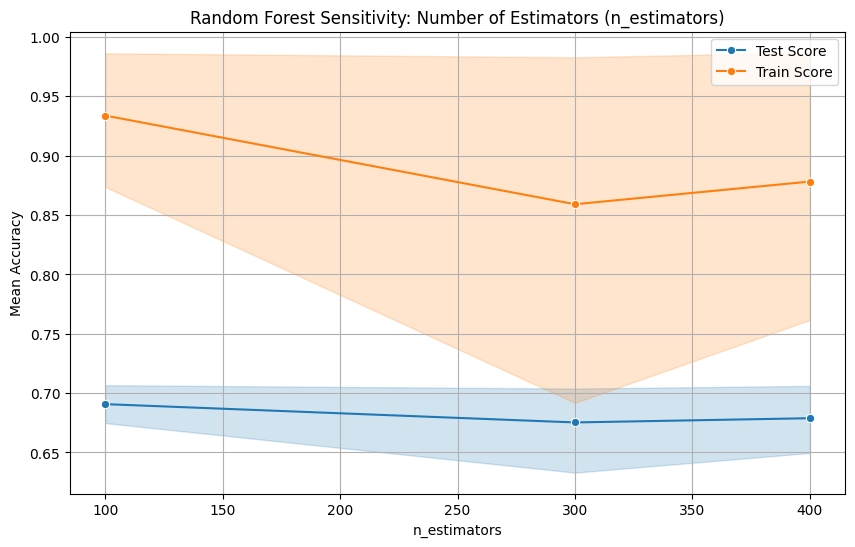

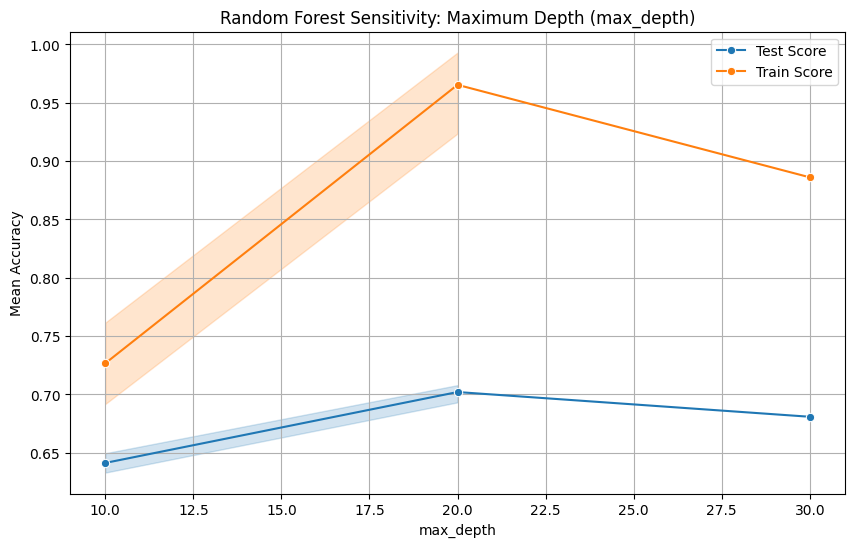

In [54]:

rf_results = pd.DataFrame(random_rf.cv_results_)

# Visualizing the impact of `n_estimators`
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=rf_results, 
    x="param_n_estimators", 
    y="mean_test_score", 
    label="Test Score", 
    marker='o'
)
sns.lineplot(
    data=rf_results, 
    x="param_n_estimators", 
    y="mean_train_score", 
    label="Train Score", 
    marker='o'
)
plt.title("Random Forest Sensitivity: Number of Estimators (n_estimators)")
plt.xlabel("n_estimators")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.grid()
plt.show()

# Visualizing the impact of `max_depth`
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=rf_results, 
    x="param_max_depth", 
    y="mean_test_score", 
    label="Test Score", 
    marker='o'
)
sns.lineplot(
    data=rf_results, 
    x="param_max_depth", 
    y="mean_train_score", 
    label="Train Score", 
    marker='o'
)
plt.title("Random Forest Sensitivity: Maximum Depth (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.grid()
plt.show()


- `n_estimators`: 
    - Training Score: remains consistently high, around 90%-95%, for all values of `n_estimators`.
    - Test Score: remains lower than the training score, indicating a possible generalization gap.
- `max_depth`: The maximum depth of each tree.
    - Training Score:As shown, the score increases with `max_depth`, reaching nearly 100% at `max_depth = 20`, and then slightly declines as the model becomes overfitted or overly complex.
    - Test Score:it peaks at around `max_depth = 20`, where the model achieves the best balance of complexity and generalization.
- This indicates that the optimal setting is `max_depth` = 20 and dding more trees stabilizes the model's performance but does not necessarily improve accuracy beyond 300 trees for `n_estimators`.

## 6.6 Feature Importance

Here we discuss the feature importances for our trained models: Random Forest and Logistic Regression

### 6.6.1 Feature Importance for Random Forest

Feature Importance for Random Forest:


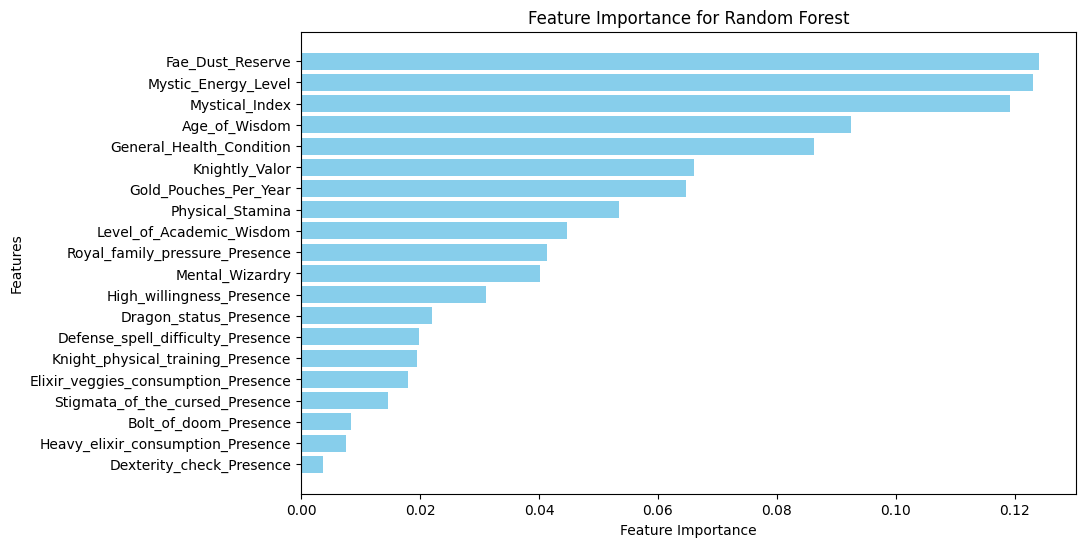

In [55]:
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        importance = model.feature_importances_

        
        feature_importance_df = pd.DataFrame({ # Creating a DataFrame for better visualization
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="skyblue")
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title(f"Feature Importance for {model_name}")
        plt.gca().invert_yaxis()
        plt.show()

        return feature_importance_df
    else:
        print(f"{model_name} does not support feature importance.")
        return None

# Get feature importance for Random Forest
print("Feature Importance for Random Forest:")
rf_feature_importance = plot_feature_importance(
    model=models_with_best_params['Random Forest'], 
    feature_names=X_train_final.columns,
    model_name="Random Forest"
)



**Top Features:**
`Fae_Dust_Reserve, Mystic_Energy_Level,` and `Mystical_Index `are the most influential features.

### 6.6.2 Feature Importance for Logistic regression

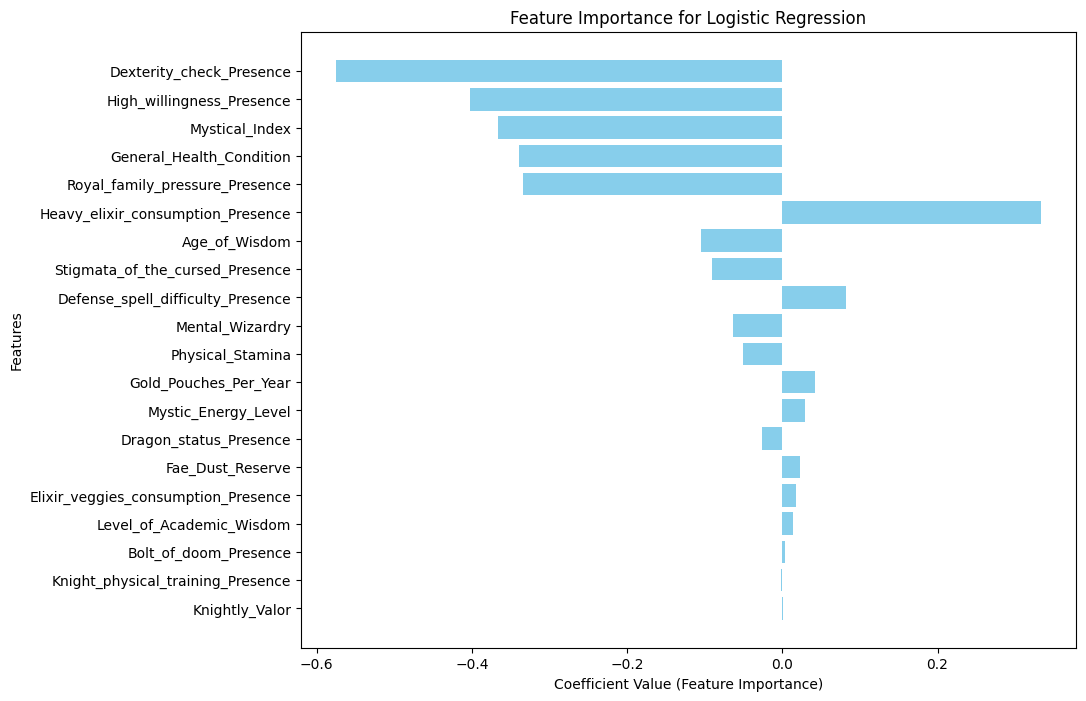

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting the trained LR model
logistic_model = models_with_best_params["Logistic Regression"]

# Get feature importance (coefficients)
feature_importance = logistic_model.coef_[0]  # Coefficients for the first class

features = X_train_final.columns 
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importance
})

# Sort the features by absolute importance
importance_df["Absolute Importance"] = np.abs(importance_df["Importance"])
importance_df = importance_df.sort_values(by="Absolute Importance", ascending=False)

# Plot the feature importance for LR
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance for Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


**Top Features:** `Dexterity_check_Presence, High_willingness_Presence,` and `Mystical_Index` have the largest coefficients, indicating their strong association with the target variable.
- Coefficients are both positive and negative, reflecting whether a feature positively or negatively influences the model's predictions.

#### Observations between the two models

- Random Forest is better at capturing non-linear relationships, so the importance of features may vary compared to Logistic Regression.
- Logistic Regression assumes linear relationships, so features with strong linear trends receive higher importance.
- Both models emphasize `Mystical_Index` as a key feature, indicating its strong relevance to the prediction task across methods.

## 6.7 PCA Visualization of Guild Membership

PCA reduces the dimensionality of the data while retaining as much variance as possible, making it ideal for visualizing high-dimensional datasets which is why we are doing this analysis.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_final)


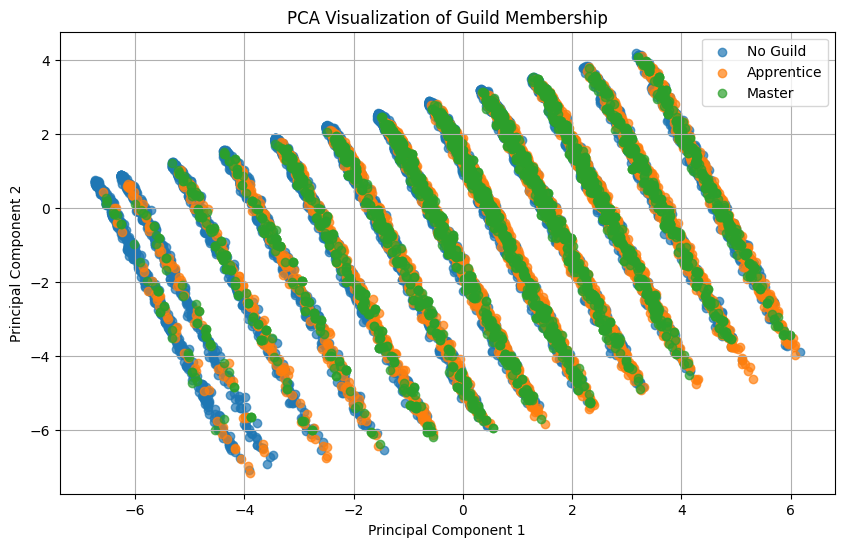

In [58]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualize data using PCA
def plot_pca(X, y, target_names):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    for i, target_name in enumerate(target_names):
        plt.scatter(
            X_pca[y == i, 0],
            X_pca[y == i, 1],
            label=target_name,
            alpha=0.7
        )
    plt.title("PCA Visualization of Guild Membership")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid()
    plt.show()

# Assuming X_train_final is your feature matrix and y_train_final is the target
target_names = ["No Guild", "Apprentice", "Master"]

plot_pca(X_train_final.values, y_train_final.values, target_names)

#### Final Observations

- Looking at the PCA visualization, we can see that the guild membership categories are quite distinct, especially the "Master" group, which stands out clearly from the other two. While there’s some overlap between "Apprentice" and "No Guild," the clusters still show enough separation to suggest that the features we’ve selected have strong discriminatory power.

- The diagonal band-like arrangement of the data is interesting—it suggests that the relationships in the dataset are systematic rather than random. This gives us confidence that the data is of high quality and meaningful for our classification goals.

- Additionally, the points are evenly distributed across the PCA space. This is a great sign because it means there isn’t any extreme bias or imbalance in the data that might affect our results.